In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/EU_Green/Catalonia'
os.chdir(folder_path)


Mounted at /content/drive


In [ ]:
import os
import requests
from zipfile import ZipFile
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc

In [ ]:
df = pd.read_csv('EPC_Catalonia.csv')
df.shape

(1336925, 69)

In [ ]:
pr_df = pd.read_csv('preprocessed_df_1.csv')
pr_df.shape


In [ ]:
eda = pd.read_csv('EDA_prepaired.csv')

### EnergyRating based on each categorical features


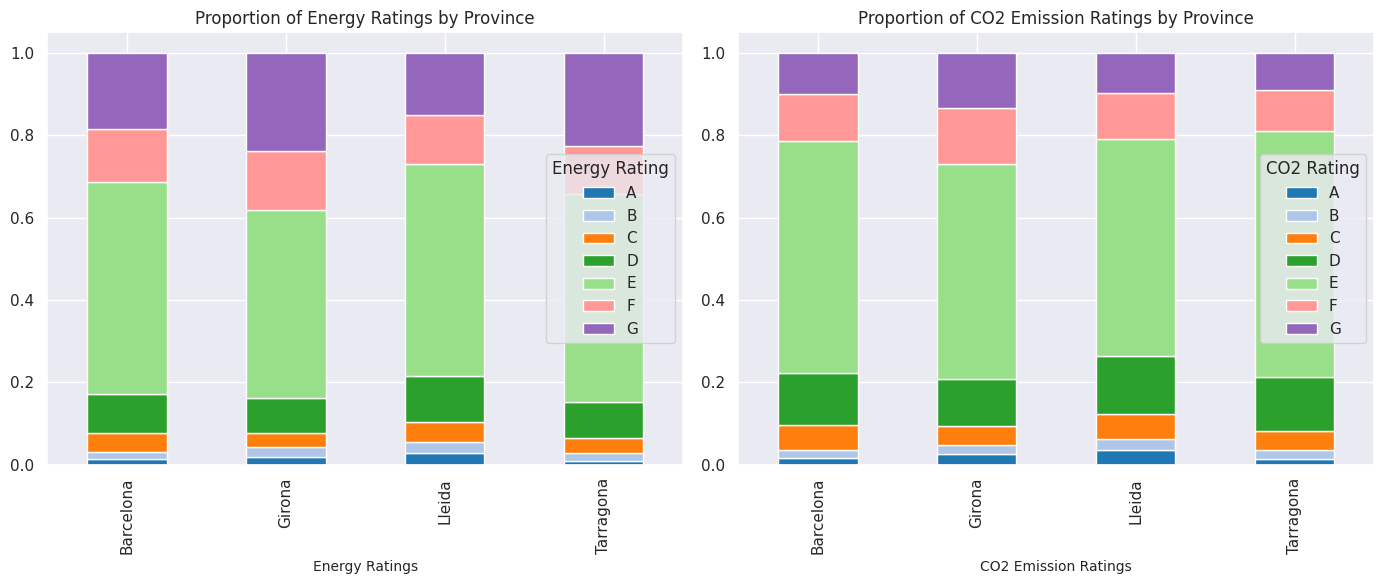

In [ ]:
grouped_df = eda.groupby(['NOM_PROVINCIA', "Qualificació de consum d'energia primaria no renovable"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='NOM_PROVINCIA', columns="Qualificació de consum d'energia primaria no renovable", values='Count').fillna(0)
proportions_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

grouped_df = eda.groupby(['NOM_PROVINCIA', "Qualificacio d'emissions de CO2"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='NOM_PROVINCIA', columns="Qualificacio d'emissions de CO2", values='Count').fillna(0)
proportions_df1 = pivot_df.div(pivot_df.sum(axis=1), axis=0)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
colors = plt.cm.tab20(np.linspace(0, 1, 15))
ax=axs[0]
proportions_plot = proportions_df.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[0])
ax.set_title(f'Proportion of Energy Ratings by Province', fontsize=12)
ax.set_xlabel('Energy Ratings', fontsize=10)
ax.legend().set_title("Energy Rating")
ax=axs[1]
proportions_plot1 = proportions_df1.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[1])

ax.set_title(f'Proportion of CO2 Emission Ratings by Province', fontsize=12)
ax.set_xlabel('CO2 Emission Ratings', fontsize=10)
ax.legend().set_title("CO2 Rating")


plt.tight_layout()
plt.show()

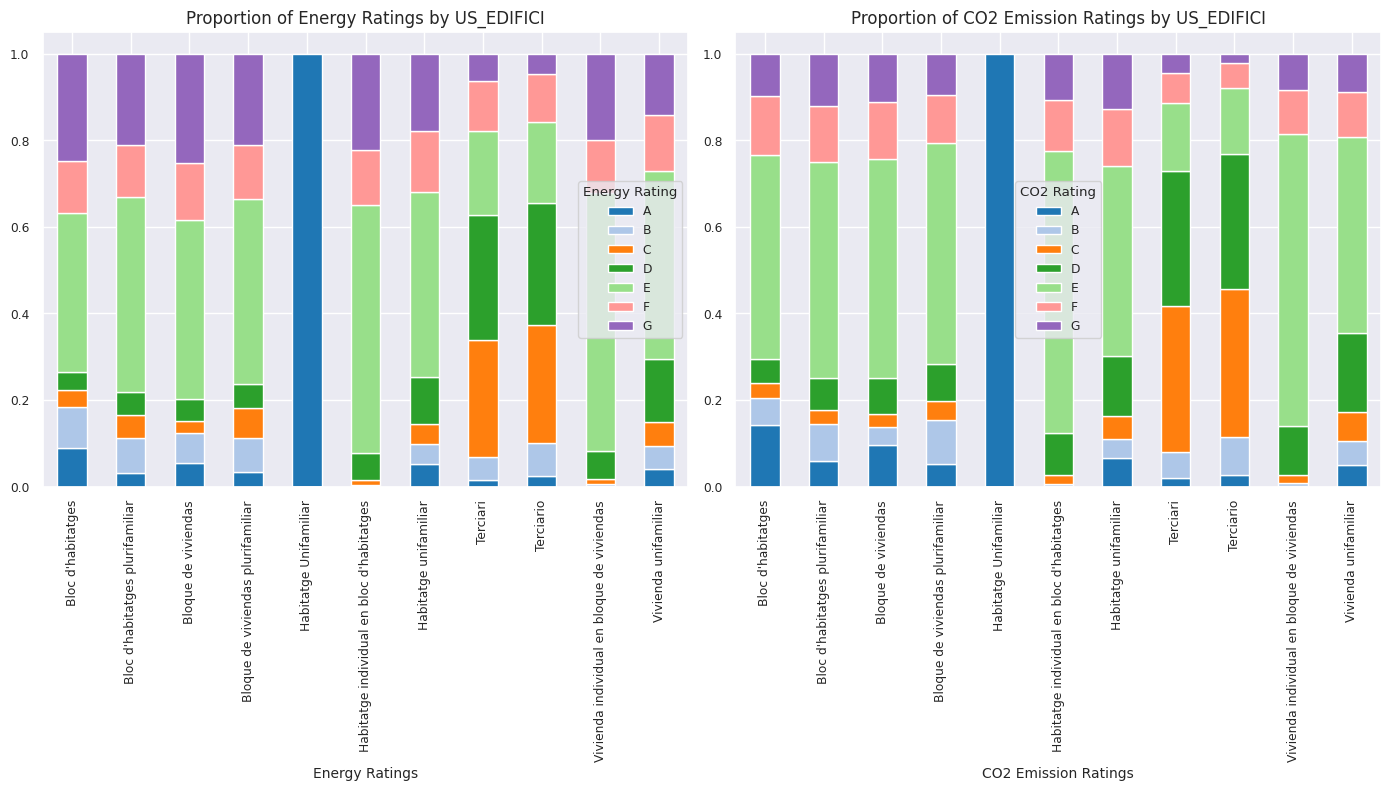

In [ ]:
sns.set(font_scale=.8)
grouped_df = eda.groupby(['US_EDIFICI', "Qualificació de consum d'energia primaria no renovable"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='US_EDIFICI', columns="Qualificació de consum d'energia primaria no renovable", values='Count').fillna(0)
proportions_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

grouped_df = eda.groupby(['US_EDIFICI', "Qualificacio d'emissions de CO2"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='US_EDIFICI', columns="Qualificacio d'emissions de CO2", values='Count').fillna(0)
proportions_df1 = pivot_df.div(pivot_df.sum(axis=1), axis=0)

fig, axs = plt.subplots(1, 2, figsize=(14, 8))
colors = plt.cm.tab20(np.linspace(0, 1, 15))
ax=axs[0]
proportions_plot = proportions_df.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[0])
ax.set_title(f'Proportion of Energy Ratings by US_EDIFICI', fontsize=12)
ax.set_xlabel('Energy Ratings', fontsize=10)
ax.legend().set_title("Energy Rating")
ax=axs[1]
proportions_plot1 = proportions_df1.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[1])

ax.set_title(f'Proportion of CO2 Emission Ratings by US_EDIFICI', fontsize=12)
ax.set_xlabel('CO2 Emission Ratings', fontsize=10)
ax.legend().set_title("CO2 Rating")


plt.tight_layout()
plt.show()

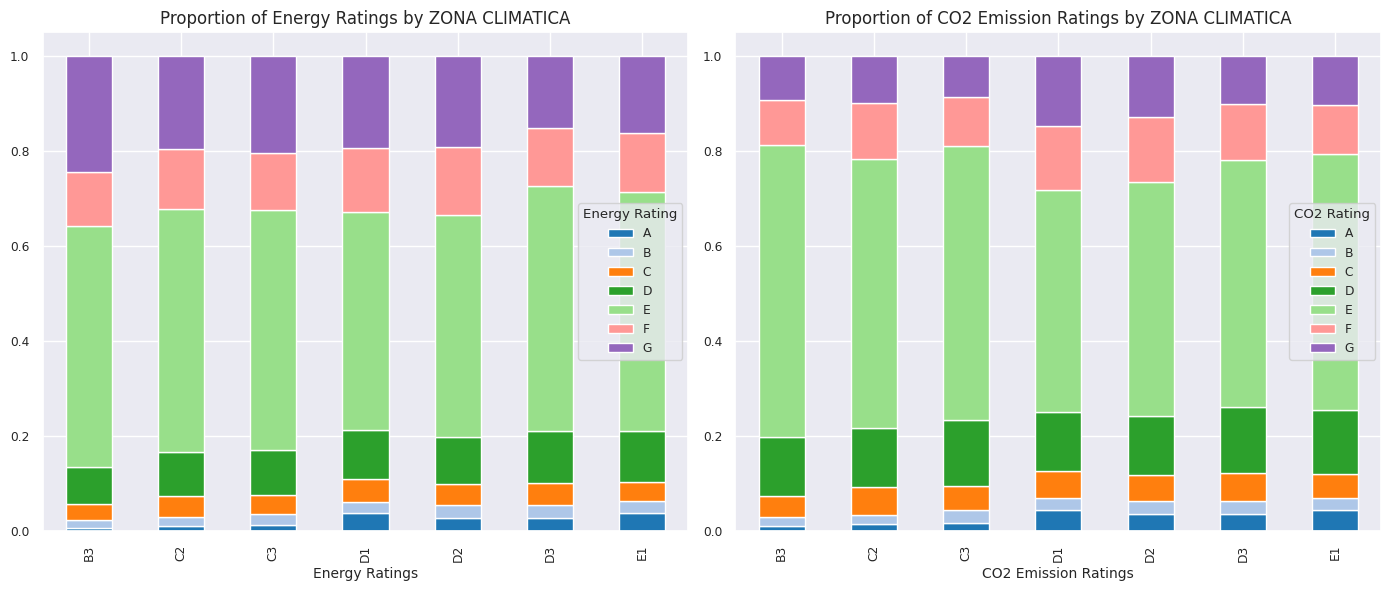

In [ ]:
sns.set(font_scale=.8)
grouped_df = eda.groupby(['ZONA CLIMATICA', "Qualificació de consum d'energia primaria no renovable"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='ZONA CLIMATICA', columns="Qualificació de consum d'energia primaria no renovable", values='Count').fillna(0)
proportions_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

grouped_df = eda.groupby(['ZONA CLIMATICA', "Qualificacio d'emissions de CO2"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='ZONA CLIMATICA', columns="Qualificacio d'emissions de CO2", values='Count').fillna(0)
proportions_df1 = pivot_df.div(pivot_df.sum(axis=1), axis=0)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
colors = plt.cm.tab20(np.linspace(0, 1, 15))
ax=axs[0]
proportions_plot = proportions_df.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[0])
ax.set_title(f'Proportion of Energy Ratings by ZONA CLIMATICA', fontsize=12)
ax.set_xlabel('Energy Ratings', fontsize=10)
ax.legend().set_title("Energy Rating")
ax=axs[1]
proportions_plot1 = proportions_df1.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[1])

ax.set_title(f'Proportion of CO2 Emission Ratings by ZONA CLIMATICA', fontsize=12)
ax.set_xlabel('CO2 Emission Ratings', fontsize=10)
ax.legend().set_title("CO2 Rating")


plt.tight_layout()
plt.show()

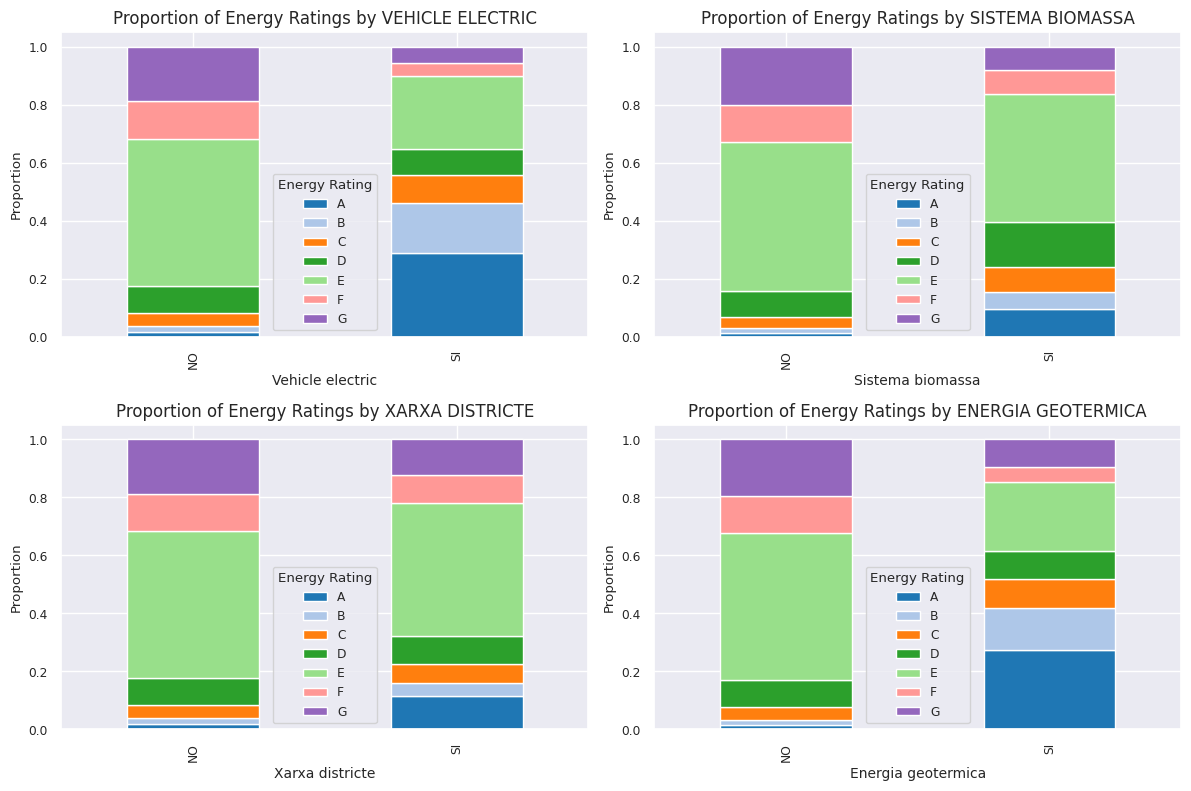

In [ ]:


# 'NoOilBoilerHeatingPumps' 'NoGasBoilerHeatingPumps' 'HeatSystemControlCat' 'HeatSystemResponseCat'
# Group data by different categories for each subplot
categories = ['VEHICLE ELECTRIC',
 'SISTEMA BIOMASSA',
 'XARXA DISTRICTE',
 'ENERGIA GEOTERMICA']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, category in enumerate(categories):
    grouped_df = df.groupby([category, "Qualificació de consum d'energia primaria no renovable"]).size().reset_index(name='Count')

    # Pivot table to get counts per category per energy rating
    pivot_df = grouped_df.pivot(index=category, columns="Qualificació de consum d'energia primaria no renovable", values='Count').fillna(0)

    # Normalize by row (category) to get proportions
    proportions_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

    # Define colors for each energy rating (assuming len(energy_ratings) matches columns)
    colors = plt.cm.tab20(np.linspace(0, 1, 15))

    # Plotting part: Stacked bars for proportions of EnergyRatings by Category
    if i==0:
      ax = axs[0][0]
    if i==1:
      ax = axs[0][1]
    if i==2:
      ax = axs[1][0]
    if i==3:
      ax = axs[1][1]



    proportions_plot = proportions_df.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=ax)

    ax.set_title(f'Proportion of Energy Ratings by {category}', fontsize=12)
    ax.set_xlabel(category.replace("_", " ").capitalize(), fontsize=10)
    ax.set_ylabel('Proportion')
    ax.legend().set_title('Energy Rating')

plt.tight_layout()
plt.show()


In [ ]:
grouped_df = eda.groupby(['NOM_PROVINCIA', "Qualificació de consum d'energia primaria no renovable"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='NOM_PROVINCIA', columns="Qualificació de consum d'energia primaria no renovable", values='Count').fillna(0)
proportions_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

grouped_df = eda.groupby(['NOM_PROVINCIA', "Qualificacio d'emissions de CO2"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='NOM_PROVINCIA', columns="Qualificacio d'emissions de CO2", values='Count').fillna(0)
proportions_df1 = pivot_df.div(pivot_df.sum(axis=1), axis=0)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
colors = plt.cm.tab20(np.linspace(0, 1, 15))
ax=axs[0]
proportions_plot = proportions_df.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[0])
ax.set_title(f'Proportion of Energy Ratings by Province', fontsize=12)
ax.set_xlabel('Energy Ratings', fontsize=10)
ax.legend().set_title("Energy Rating")
ax=axs[1]
proportions_plot1 = proportions_df1.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[1])

ax.set_title(f'Proportion of CO2 Emission Ratings by Province', fontsize=12)
ax.set_xlabel('CO2 Emission Ratings', fontsize=10)
ax.legend().set_title("CO2 Rating")


plt.tight_layout()
plt.show()

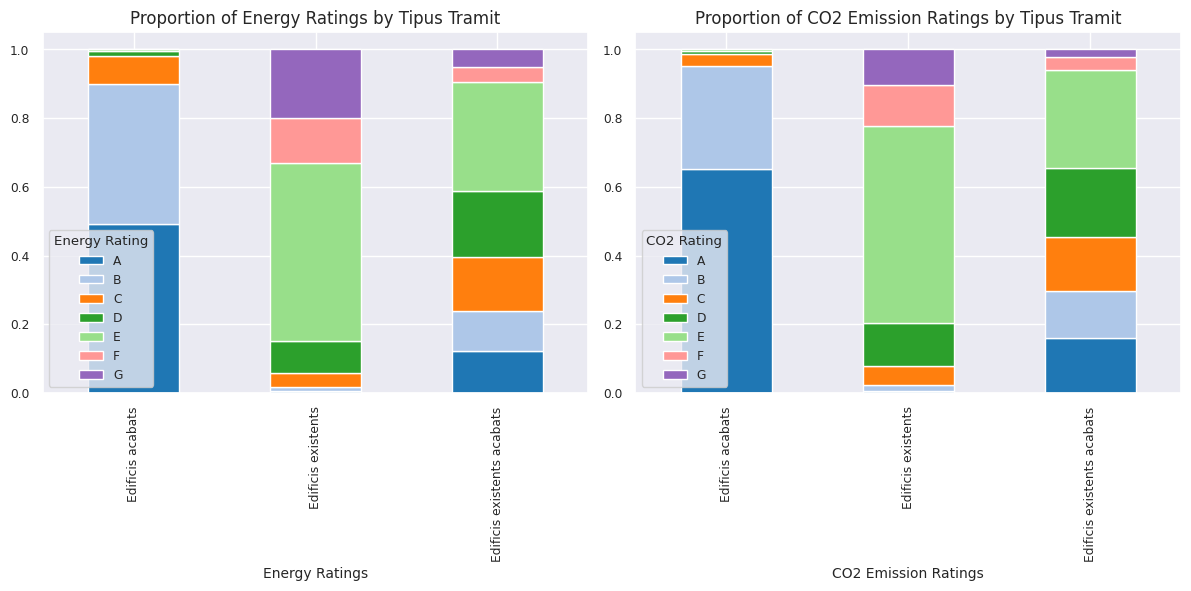

In [ ]:
sns.set(font_scale=.8)
grouped_df = eda.groupby(['Tipus Tramit', "Qualificació de consum d'energia primaria no renovable"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='Tipus Tramit', columns="Qualificació de consum d'energia primaria no renovable", values='Count').fillna(0)
proportions_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

grouped_df = eda.groupby(['Tipus Tramit', "Qualificacio d'emissions de CO2"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='Tipus Tramit', columns="Qualificacio d'emissions de CO2", values='Count').fillna(0)
proportions_df1 = pivot_df.div(pivot_df.sum(axis=1), axis=0)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
colors = plt.cm.tab20(np.linspace(0, 1, 15))
ax=axs[0]
proportions_plot = proportions_df.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[0])
ax.set_title(f'Proportion of Energy Ratings by Tipus Tramit', fontsize=12)
ax.set_xlabel('Energy Ratings', fontsize=10)
ax.legend().set_title("Energy Rating")
ax=axs[1]
proportions_plot1 = proportions_df1.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[1])

ax.set_title(f'Proportion of CO2 Emission Ratings by Tipus Tramit', fontsize=12)
ax.set_xlabel('CO2 Emission Ratings', fontsize=10)
ax.legend().set_title("CO2 Rating")


plt.tight_layout()
plt.show()

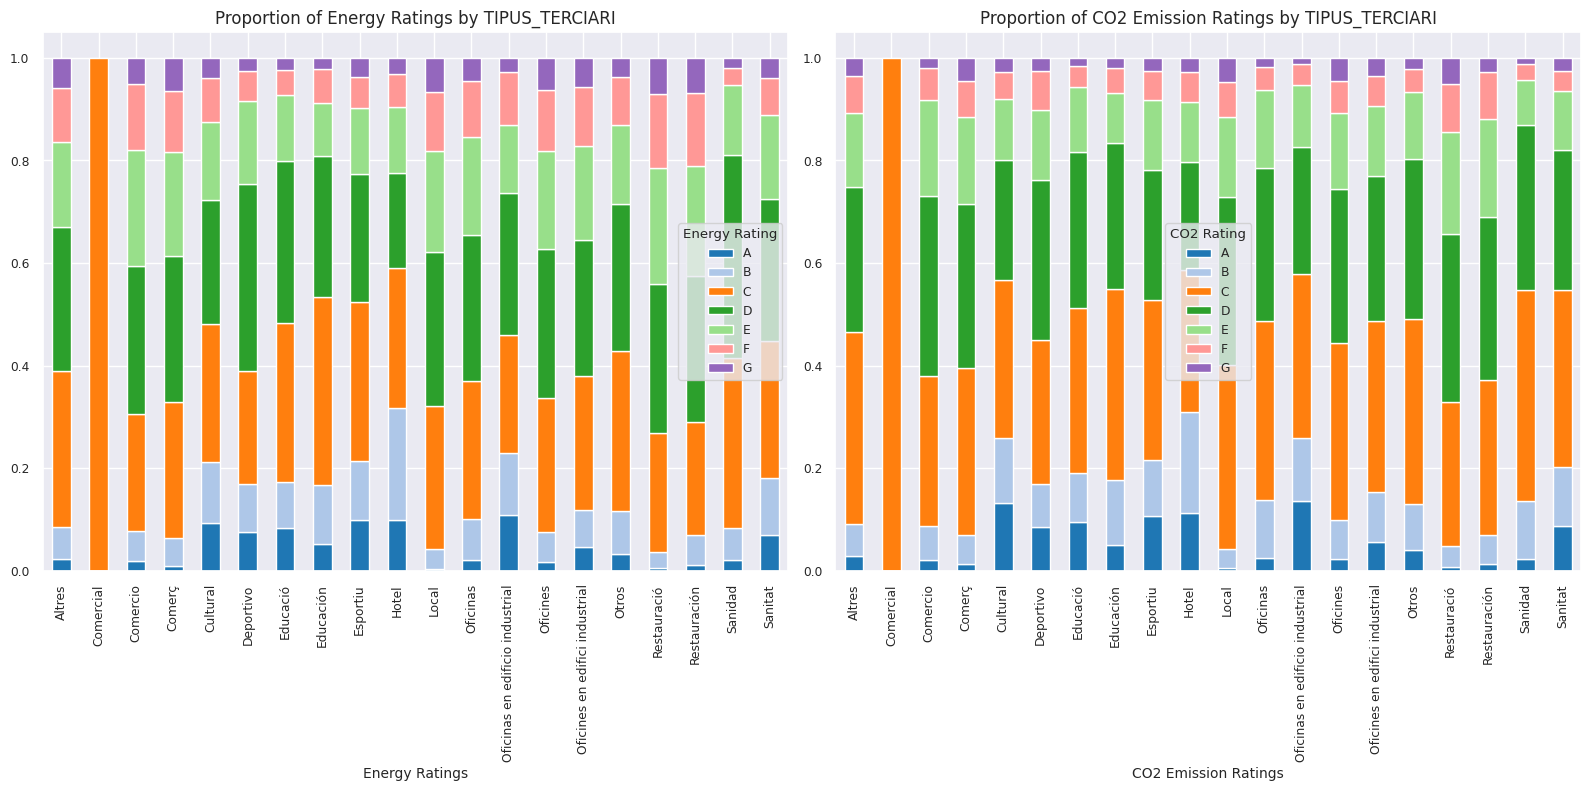

In [ ]:
sns.set(font_scale=.8)
grouped_df = eda.groupby(['TIPUS_TERCIARI', "Qualificació de consum d'energia primaria no renovable"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='TIPUS_TERCIARI', columns="Qualificació de consum d'energia primaria no renovable", values='Count').fillna(0)
proportions_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

grouped_df = eda.groupby(['TIPUS_TERCIARI', "Qualificacio d'emissions de CO2"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='TIPUS_TERCIARI', columns="Qualificacio d'emissions de CO2", values='Count').fillna(0)
proportions_df1 = pivot_df.div(pivot_df.sum(axis=1), axis=0)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
colors = plt.cm.tab20(np.linspace(0, 1, 15))
ax=axs[0]
proportions_plot = proportions_df.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[0])
ax.set_title(f'Proportion of Energy Ratings by TIPUS_TERCIARI', fontsize=12)
ax.set_xlabel('Energy Ratings', fontsize=10)
ax.legend().set_title("Energy Rating")
ax=axs[1]
proportions_plot1 = proportions_df1.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[1])

ax.set_title(f'Proportion of CO2 Emission Ratings by TIPUS_TERCIARI', fontsize=12)
ax.set_xlabel('CO2 Emission Ratings', fontsize=10)
ax.legend().set_title("CO2 Rating")


plt.tight_layout()
plt.show()

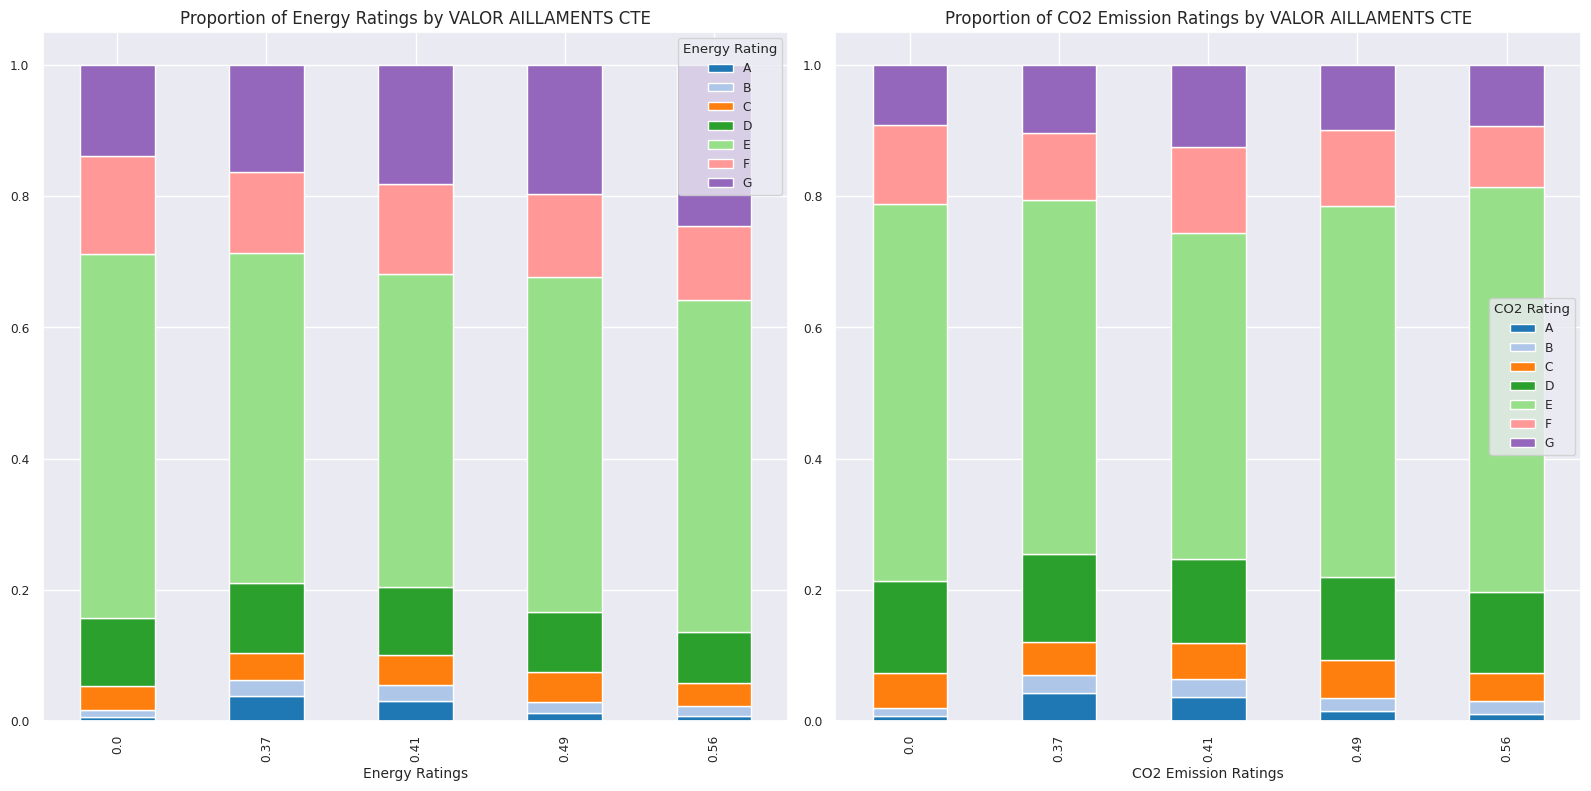

In [ ]:
sns.set(font_scale=.8)
grouped_df = eda.groupby(['VALOR AILLAMENTS CTE', "Qualificació de consum d'energia primaria no renovable"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='VALOR AILLAMENTS CTE', columns="Qualificació de consum d'energia primaria no renovable", values='Count').fillna(0)
proportions_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

grouped_df = eda.groupby(['VALOR AILLAMENTS CTE', "Qualificacio d'emissions de CO2"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='VALOR AILLAMENTS CTE', columns="Qualificacio d'emissions de CO2", values='Count').fillna(0)
proportions_df1 = pivot_df.div(pivot_df.sum(axis=1), axis=0)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
colors = plt.cm.tab20(np.linspace(0, 1, 15))
ax=axs[0]
proportions_plot = proportions_df.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[0])
ax.set_title(f'Proportion of Energy Ratings by VALOR AILLAMENTS CTE', fontsize=12)
ax.set_xlabel('Energy Ratings', fontsize=10)
ax.legend().set_title("Energy Rating")
ax=axs[1]
proportions_plot1 = proportions_df1.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[1])

ax.set_title(f'Proportion of CO2 Emission Ratings by VALOR AILLAMENTS CTE', fontsize=12)
ax.set_xlabel('CO2 Emission Ratings', fontsize=10)
ax.legend().set_title("CO2 Rating")


plt.tight_layout()
plt.show()

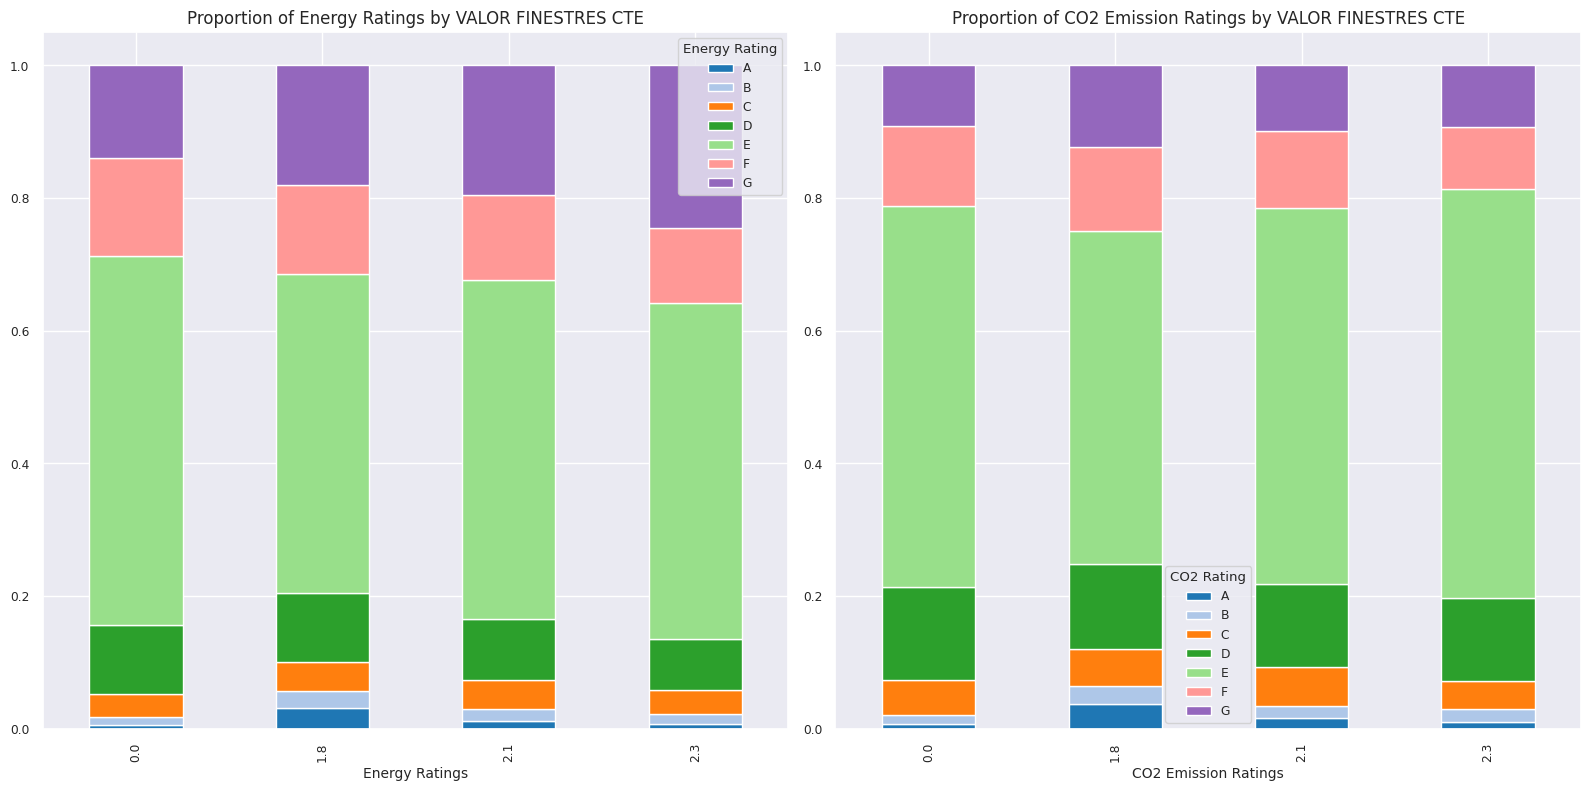

In [ ]:

sns.set(font_scale=.8)
grouped_df = eda.groupby(['VALOR FINESTRES CTE', "Qualificació de consum d'energia primaria no renovable"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='VALOR FINESTRES CTE', columns="Qualificació de consum d'energia primaria no renovable", values='Count').fillna(0)
proportions_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

grouped_df = eda.groupby(['VALOR FINESTRES CTE', "Qualificacio d'emissions de CO2"]).size().reset_index(name='Count')
pivot_df = grouped_df.pivot(index='VALOR FINESTRES CTE', columns="Qualificacio d'emissions de CO2", values='Count').fillna(0)
proportions_df1 = pivot_df.div(pivot_df.sum(axis=1), axis=0)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
colors = plt.cm.tab20(np.linspace(0, 1, 15))
ax=axs[0]
proportions_plot = proportions_df.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[0])
ax.set_title(f'Proportion of Energy Ratings by VALOR FINESTRES CTE', fontsize=12)
ax.set_xlabel('Energy Ratings', fontsize=10)
ax.legend().set_title("Energy Rating")
ax=axs[1]
proportions_plot1 = proportions_df1.plot(kind='bar', stacked=True,
                                           color=colors,
                                           ax=axs[1])

ax.set_title(f'Proportion of CO2 Emission Ratings by VALOR FINESTRES CTE', fontsize=12)
ax.set_xlabel('CO2 Emission Ratings', fontsize=10)
ax.legend().set_title("CO2 Rating")


plt.tight_layout()
plt.show()

###  Compare Energy Consumption of heating , lightening and refrigerator

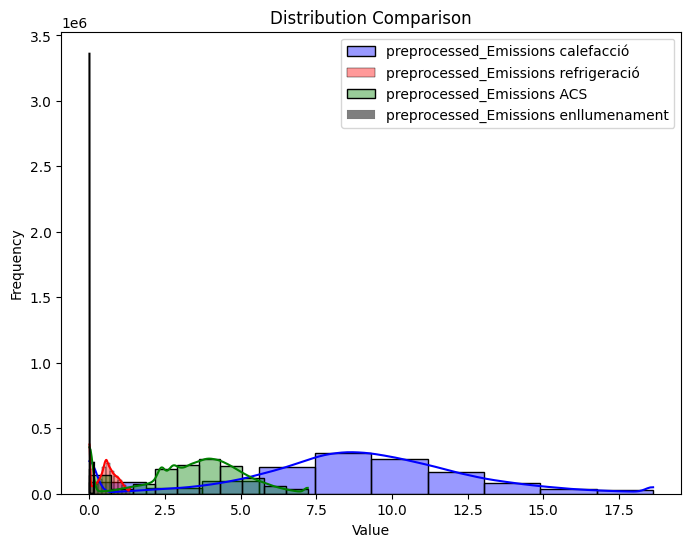

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

sns.histplot(data=eda['preprocessed_Emissions calefacció'], bins=10, alpha=0.4, label='preprocessed_Emissions calefacció', color='blue', kde=True)
sns.histplot(data=eda['preprocessed_Emissions refrigeració'], bins=10, alpha=0.4, label='preprocessed_Emissions refrigeració', color='red', kde=True)
sns.histplot(data=eda['preprocessed_Emissions ACS'], bins=10, alpha=0.4, label='preprocessed_Emissions ACS', color='green', kde=True)
sns.histplot(data=eda['preprocessed_Emissions enllumenament'], bins=10, alpha=0.5, label='preprocessed_Emissions enllumenament', color='black', kde=True)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')
plt.legend()

# Show the plot
plt.show()


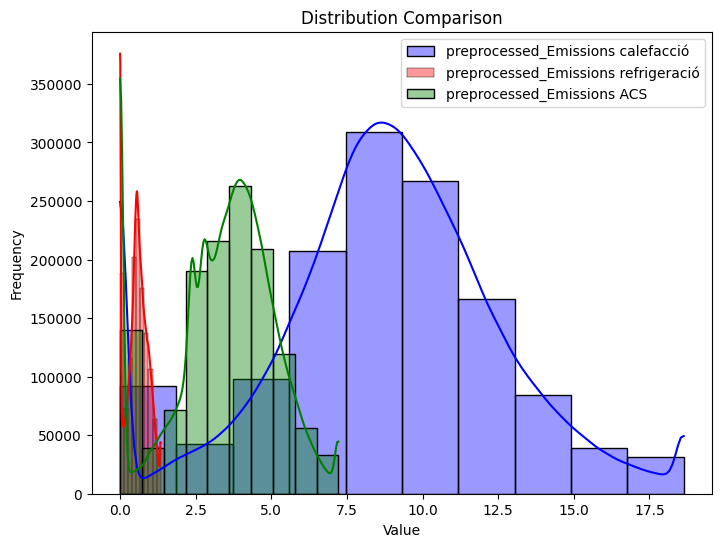

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

sns.histplot(data=eda['preprocessed_Emissions calefacció'], bins=10, alpha=0.4, label='preprocessed_Emissions calefacció', color='blue', kde=True)
sns.histplot(data=eda['preprocessed_Emissions refrigeració'], bins=10, alpha=0.4, label='preprocessed_Emissions refrigeració', color='red', kde=True)
sns.histplot(data=eda['preprocessed_Emissions ACS'], bins=10, alpha=0.4, label='preprocessed_Emissions ACS', color='green', kde=True)
# sns.histplot(data=eda['preprocessed_Emissions enllumenament'], bins=10, alpha=0.5, label='preprocessed_Emissions enllumenament', color='black', kde=True)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')
plt.legend()

# Show the plot
plt.show()


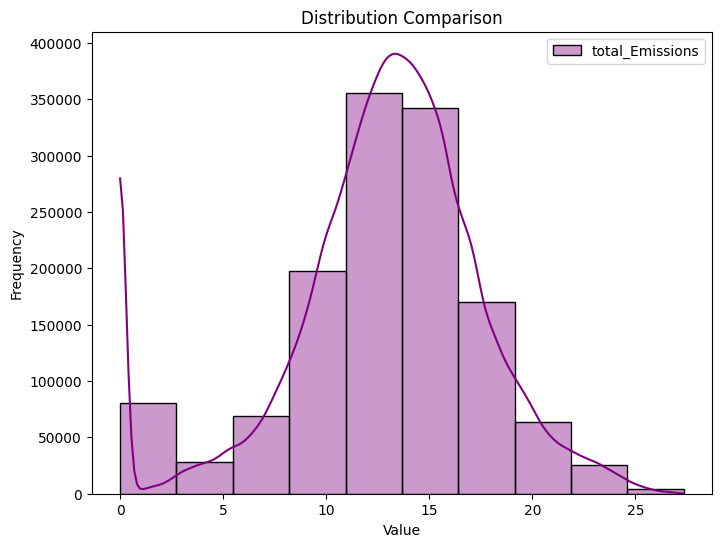

In [ ]:
cols = [
    'preprocessed_Emissions calefacció',
    'preprocessed_Emissions refrigeració',
    'preprocessed_Emissions ACS',
    'preprocessed_Emissions enllumenament'
]
eda['total_Emissions']= eda[cols].sum(axis=1)
plt.figure(figsize=(8, 6))

sns.histplot(data=eda['total_Emissions'], bins=10, alpha=0.4, label='total_Emissions', color='purple', kde=True)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')
plt.legend()

# Show the plot
plt.show()

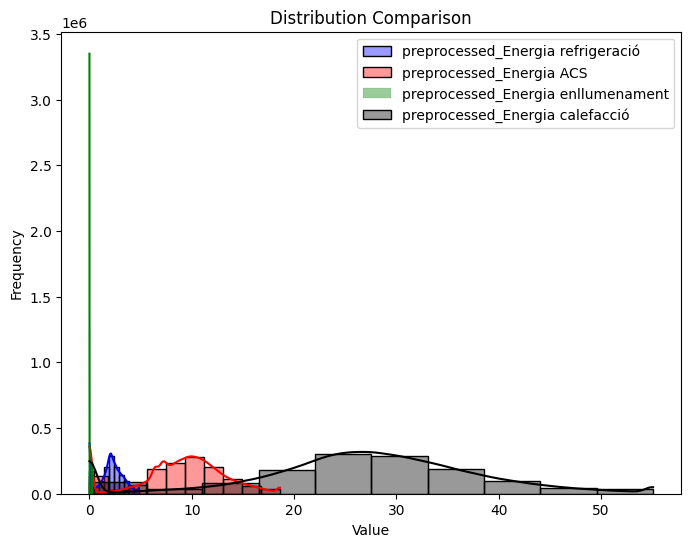

In [ ]:
cols = [
    'preprocessed_Energia calefacció',
    'preprocessed_Energia refrigeració',
    'preprocessed_Energia ACS',
    'preprocessed_Energia enllumenament'
]

plt.figure(figsize=(8, 6))

sns.histplot(data=eda[cols[1]], bins=10, alpha=0.4, label=cols[1], color='blue', kde=True)
sns.histplot(data=eda[cols[2]], bins=10, alpha=0.4, label=cols[2], color='red', kde=True)
sns.histplot(data=eda[cols[3]], bins=10, alpha=0.4, label=cols[3], color='green', kde=True)
sns.histplot(data=eda[cols[0]], bins=10, alpha=0.4, label=cols[0], color='black', kde=True)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')
plt.legend()

# Show the plot
plt.show()

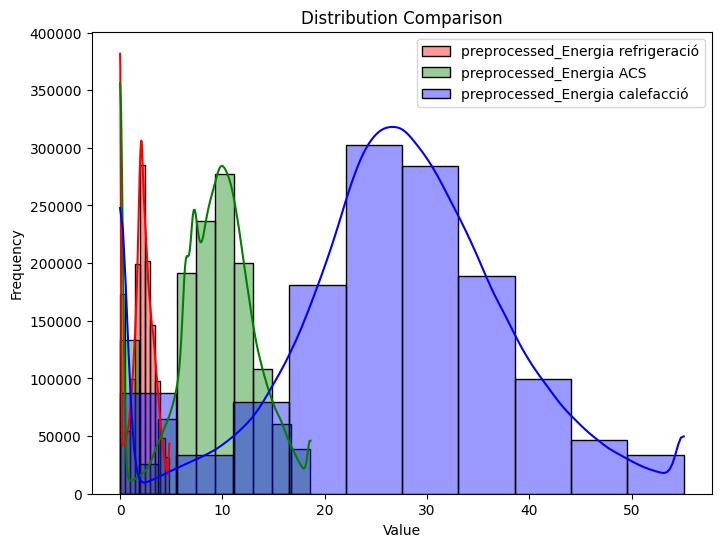

In [ ]:
cols = [
    'preprocessed_Energia calefacció',
    'preprocessed_Energia refrigeració',
    'preprocessed_Energia ACS',
    'preprocessed_Energia enllumenament'
]

plt.figure(figsize=(8, 6))

sns.histplot(data=eda[cols[1]], bins=10, alpha=0.4, label=cols[1], color='red', kde=True)
sns.histplot(data=eda[cols[2]], bins=10, alpha=0.4, label=cols[2], color='green', kde=True)
# sns.histplot(data=eda[cols[3]], bins=10, alpha=0.4, label=cols[3], color='green', kde=True)
sns.histplot(data=eda[cols[0]], bins=10, alpha=0.4, label=cols[0], color='blue', kde=True)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')
plt.legend()

# Show the plot
plt.show()

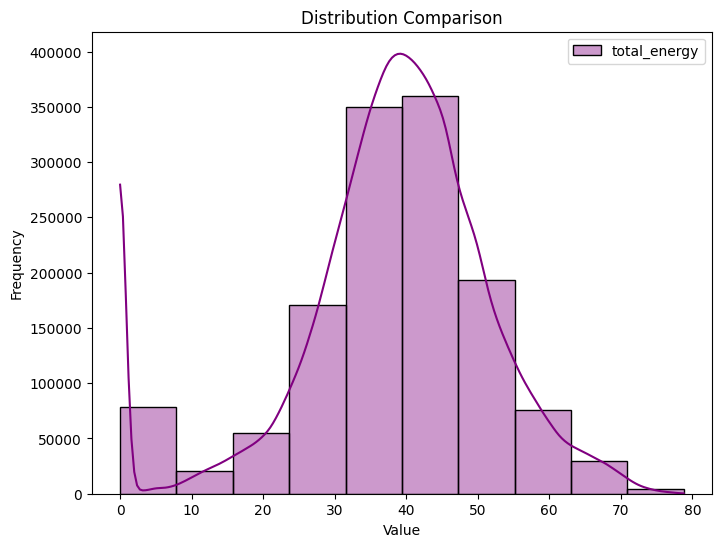

In [ ]:
cols = [
    'preprocessed_Energia calefacció',
    'preprocessed_Energia refrigeració',
    'preprocessed_Energia ACS',
    'preprocessed_Energia enllumenament'
]
eda['total_energy']= eda[cols].sum(axis=1)

plt.figure(figsize=(8, 6))

sns.histplot(data=eda['total_energy'], bins=10, alpha=0.4, label='total_energy', color='purple', kde=True)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')
plt.legend()

# Show the plot
plt.show()

### Renovation measures influence  in Terms of Energy Consumption(KW/YEAR) and Cost

In [ ]:
eda['REHABILITACIO_ENERGETICA'].unique()

array(['NO', nan, 'SI'], dtype=object)

In [ ]:
print('number of houses which have done renovation: ', len(df[df['REHABILITACIO_ENERGETICA']=='SI']))
print('percentage of houses which have done renovation: ', len(df[df['REHABILITACIO_ENERGETICA']=='SI'])/len(df['REHABILITACIO_ENERGETICA']))

number of houses which have done renovation:  18326
percentage of houses which have done renovation:  0.013707575219253136


In [ ]:
print('mean of energy consumption of houses WITH renovation actions:', eda[eda['REHABILITACIO_ENERGETICA']=='SI']['total_energy'].mean(), 'KW/m2')
print('mean of energy consumption of houses WITHOUT renovation actions:', eda[eda['REHABILITACIO_ENERGETICA']!='SI']['total_energy'].mean(), 'KW/m2')

mean of energy consumption of houses WITH renovation actions: 34.451784179450854 KW/m2
mean of energy consumption of houses WITHOUT renovation actions: 37.9872018723767 KW/m2


In [ ]:
eda[eda['REHABILITACIO_ENERGETICA']=='SI']['total_energy'].describe()

,total_energy
count,18326.000000
mean,34.451784
std,12.983372
min,0.000000
25%,25.186262
50%,34.620581
75%,43.447525
max,77.338540


In [ ]:
eda[eda['REHABILITACIO_ENERGETICA']!='SI']['total_energy'].describe()

,total_energy
count,1.318599e+06
mean,3.798720e+01
std,1.414831e+01
min,0.000000e+00
25%,3.189851e+01
50%,3.933315e+01
75%,4.645371e+01
max,7.879068e+01


In [ ]:
print('mean of energy consumption of houses WITH renovation actions:', eda[eda['REHABILITACIO_ENERGETICA']=='SI']['total_Emissions'].mean(), 'kg CO2/m2')
print('mean of energy consumption of houses WITHOUT renovation actions:', eda[eda['REHABILITACIO_ENERGETICA']!='SI']['total_Emissions'].mean(), 'kg CO2/m2')

mean of energy consumption of houses WITH renovation actions: 11.212839784843176 kg CO2/m2
mean of energy consumption of houses WITHOUT renovation actions: 12.765658913426607 kg CO2/m2


In [ ]:
print(eda[eda['ACTUACIONS_REHABILITACIO'].notna()]['REHABILITACIO_ENERGETICA'].unique())
print(len(eda[(eda['REHABILITACIO_ENERGETICA'] == 'SI') & (eda['ACTUACIONS_REHABILITACIO'].notna())]))
print('number of houses which have done renovation based on ACTUACIONS_REHABILITACIO: ', len(eda[eda['ACTUACIONS_REHABILITACIO'].notna()]))

['SI' 'NO']
17083
number of houses which have done renovation based on ACTUACIONS_REHABILITACIO:  17112


In [ ]:
ren = pd.read_csv('preprocessed_renovation.csv')
ren

,Unnamed: 0,Renovation_Types,Translated_Renovation_Types,Merge_All_Photovoltaic,grouped_translated
0,28,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
1,100,"[""Es tracta d'un edifici en construcció amb un...",It is a building under construction with a gra...,It is a building under construction with a gra...,Other
2,111,['Renovació de finestres i/o proteccions solar...,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.
3,111,['Renovació de finestres i/o proteccions solar...,"Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
4,199,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
...,...,...,...,...,...
25907,1336532,"['Aïllament en façanes i/o coberta.', 'Renovac...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."
25908,1336570,['Renovació de finestres i/o proteccions solar...,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.
25909,1336683,['Renovació de finestres i/o proteccions solar...,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.,Renewal of windows and/or sun protections.
25910,1336815,"['Millora de les instal·lacions (calefacció, c...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit...","Improvement of facilities (heating, air condit..."


In [ ]:
merged_eda = eda.merge(ren[['grouped_translated', 'Unnamed: 0']],left_index=True, right_on='Unnamed: 0', how='left')


In [ ]:
merged_df = df.merge(ren[['grouped_translated', 'Unnamed: 0']],left_index=True, right_on='Unnamed: 0', how='left')


In [ ]:
grouped_stats = merged_eda.groupby('grouped_translated')['Emissions de CO2'].agg(['mean', 'median', 'std', 'count']).reset_index()
print('Statistics of the impact of renovation_type on CO2 emission')
grouped_stats

Statistics of the impact of renovation_type on CO2 emission


,grouped_translated,mean,median,std,count
0,Aislamiento in face and/or cube.,23.364585,19.240,17.965359,253
1,"Improvement of facilities (heating, air condit...",19.703294,15.970,14.758063,9173
2,Installation Poovoltaicas,27.840645,25.930,18.305020,62
3,Installation of Popovoltaic Places,22.004545,18.140,17.528732,22
4,Insulation on facades and/or roof.,23.239932,18.430,17.984470,3810
5,Other,22.143931,18.745,16.114891,1328
6,Photovoltaic,24.781618,22.030,18.041134,2992
7,"Remodeling of LSE windows and installations, a...",20.853077,21.900,2.662663,13
8,Renewal of windows and/or sun protections.,31.957367,28.150,23.613232,7521
9,Renovation of ventanes and/or solar protectiones.,24.958589,22.240,16.313664,397


In [ ]:
grouped_stats = merged_eda.groupby('grouped_translated')['total_Emissions'].agg(['mean', 'median', 'std', 'count']).reset_index()
print('Statistics of the impact of renovation_type on CO2 emission')
grouped_stats

Statistics of the impact of renovation_type on CO2 emission


,grouped_translated,mean,median,std,count
0,Aislamiento in face and/or cube.,24.360553,20.150,18.102333,253
1,"Improvement of facilities (heating, air condit...",24.827574,21.160,16.703014,9173
2,Installation Poovoltaicas,43.573548,39.955,19.511432,62
3,Installation of Popovoltaic Places,33.434545,26.265,23.013290,22
4,Insulation on facades and/or roof.,24.302459,19.620,18.000814,3810
5,Other,27.162417,24.705,17.099280,1328
6,Photovoltaic,37.467320,35.225,19.567698,2992
7,"Remodeling of LSE windows and installations, a...",20.855385,21.900,2.665200,13
8,Renewal of windows and/or sun protections.,32.805482,29.190,23.415550,7521
9,Renovation of ventanes and/or solar protectiones.,25.591159,22.400,16.141058,397


In [ ]:
grouped_stats = merged_eda.groupby('grouped_translated')[ "Consum d'energia final",].agg(['mean', 'median', 'std', 'count']).reset_index()
print('Statistics of the impact of renovation_type on Energy Consumption')
grouped_stats

Statistics of the impact of renovation_type on Energy Consumption


grouped_translated Consum d'energia final  \
                                                                        mean   
0                    Aislamiento in face and/or cube.              84.374672   
1   Improvement of facilities (heating, air condit...              77.972948   
2                           Installation Poovoltaicas             104.789677   
3                  Installation of Popovoltaic Places             108.810909   
4                  Insulation on facades and/or roof.              89.401544   
5                                               Other              81.783171   
6                                        Photovoltaic              96.768191   
7   Remodeling of LSE windows and installations, a...              64.556923   
8          Renewal of windows and/or sun protections.             121.130492   
9   Renovation of ventanes and/or solar protectiones.              89.575299   
10                                        solar panel              99.484428   

                              
     median        std count  
0    65.655  73.079985   244  
1    60.160  68.250390  9105  
2    96.960  65.774400    62  
3    80.940  89.688595    22  
4    70.340  72.392421  3751  
5    68.030  64.117750  1315  
6    86.290  71.912700  2991  
7    66.410  10.241490    13  
8   107.320  88.770941  7454  
9    77.560  63.982733   385  
10   91.750  59.085441   341

In [ ]:
grouped_stats = merged_eda.groupby('grouped_translated')["total_energy"].agg(['mean', 'median', 'std', 'count']).reset_index()
print('Statistics of the impact of renovation_type on Finantial Cost')
grouped_stats

Statistics of the impact of renovation_type on Finantial Cost


,grouped_translated,mean,median,std,count
0,Aislamiento in face and/or cube.,126.923874,109.290,85.968457,253
1,"Improvement of facilities (heating, air condit...",131.041201,114.960,82.392462,9173
2,Installation Poovoltaicas,220.445161,201.595,90.784208,62
3,Installation of Popovoltaic Places,167.218636,135.400,111.076397,22
4,Insulation on facades and/or roof.,124.778333,104.885,85.370696,3810
5,Other,142.732748,131.850,84.655859,1328
6,Photovoltaic,190.680919,183.390,91.686762,2992
7,"Remodeling of LSE windows and installations, a...",121.152308,129.280,16.604822,13
8,Renewal of windows and/or sun protections.,163.483598,149.780,109.615652,7521
9,Renovation of ventanes and/or solar protectiones.,133.342065,122.320,77.370015,397


In [ ]:
grouped_stats = merged_eda.groupby('grouped_translated')["Cost anual aproximat d'energia per habitatge"].agg(['mean', 'median', 'std', 'count']).reset_index()
grouped_stats

,grouped_translated,mean,median,std,count
0,Aislamiento in face and/or cube.,7.897828,6.725,5.882529,244
1,"Improvement of facilities (heating, air condit...",7.019537,5.880,5.412156,9105
2,Installation Poovoltaicas,7.526774,7.000,5.122675,62
3,Installation of Popovoltaic Places,6.996364,5.660,5.022149,22
4,Insulation on facades and/or roof.,6.957329,5.680,5.930049,3751
5,Other,8.499894,6.140,41.617420,1315
6,Photovoltaic,7.363477,6.410,5.925889,2991
7,"Remodeling of LSE windows and installations, a...",9.596154,10.490,1.817235,13
8,Renewal of windows and/or sun protections.,10.097678,9.110,7.737821,7454
9,Renovation of ventanes and/or solar protectiones.,8.640519,7.700,5.788433,385


In [ ]:

grouped_stats = merged_eda.groupby('grouped_translated')["Energia primària no renovable"].agg(['mean', 'median', 'std', 'count']).reset_index()
grouped_stats

,grouped_translated,mean,median,std,count
0,Aislamiento in face and/or cube.,121.046482,103.520,85.139733,253
1,"Improvement of facilities (heating, air condit...",100.737327,85.350,71.354904,9173
2,Installation Poovoltaicas,127.576774,110.630,80.798859,62
3,Installation of Popovoltaic Places,99.744545,83.655,72.926716,22
4,Insulation on facades and/or roof.,118.405110,97.620,85.441497,3810
5,Other,112.948825,98.130,79.861133,1328
6,Photovoltaic,115.806250,105.590,81.061414,2992
7,"Remodeling of LSE windows and installations, a...",121.153077,129.280,16.602821,13
8,Renewal of windows and/or sun protections.,158.430468,144.350,110.754762,7521
9,Renovation of ventanes and/or solar protectiones.,129.609345,117.750,78.624423,397


CO2

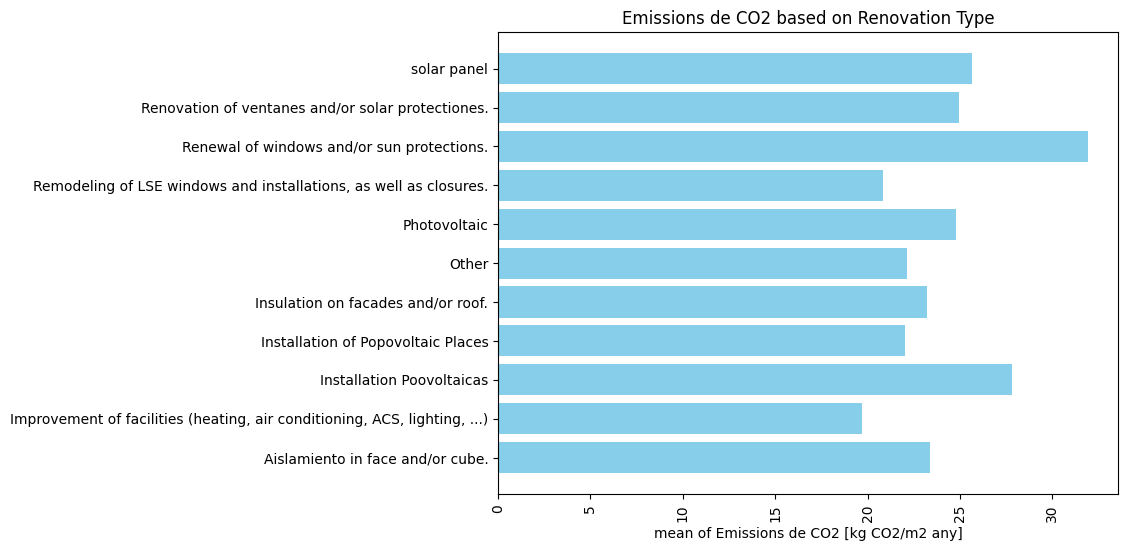

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Aggregate mean values for each renovation type
df_agg = merged_eda.groupby("grouped_translated").agg({
    "total_Emissions": "mean",
    "Emissions de CO2": "mean"
    # "total_energy": "mean",
    # "preprocessed_Cost anual aproximat d'energia per habitatge": "mean"
}).reset_index()

fig, axs = plt.subplots( figsize=(8, 6))
# Plot first metric at the bottom
plt.barh(df_agg["grouped_translated"], df_agg["Emissions de CO2"],
       label="Emissions de CO2  [kg CO2/m2 any]", color="skyblue", )
plt.title("Emissions de CO2 based on Renovation Type")
plt.xlabel("mean of Emissions de CO2 [kg CO2/m2 any]")
plt.tick_params(axis='x', labelrotation=90)
plt.show()


energy

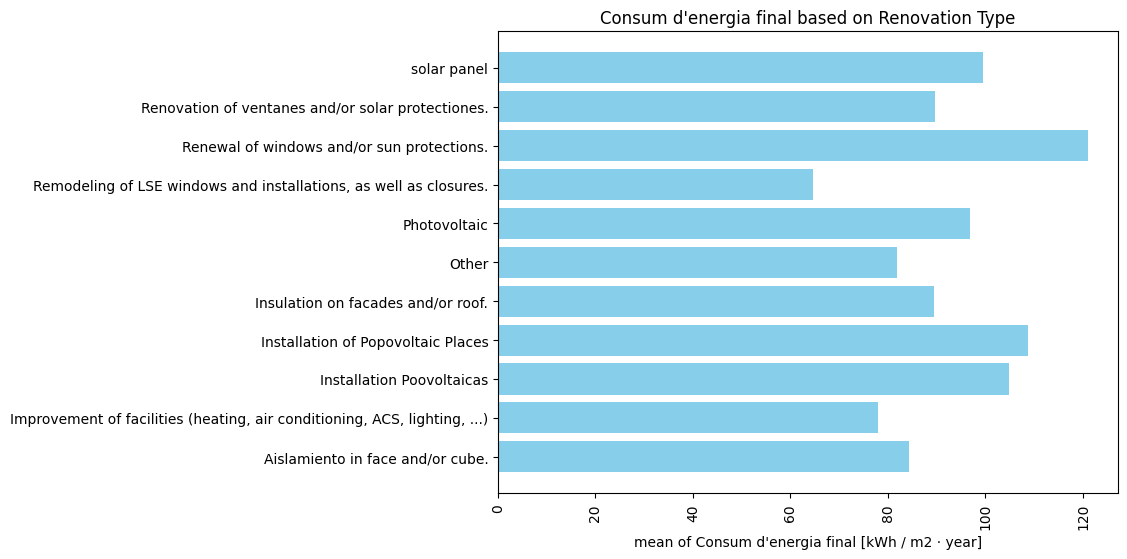

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Aggregate mean values for each renovation type
df_agg = merged_eda.groupby("grouped_translated").agg({
    "total_energy": "mean",
    "Consum d'energia final": "mean",
    # "total_energy": "mean",
    # "preprocessed_Cost anual aproximat d'energia per habitatge": "mean"
}).reset_index()


fig, axs = plt.subplots( figsize=(8, 6))
# Plot first metric at the bottom
plt.barh(df_agg["grouped_translated"], df_agg["Consum d'energia final"],
       label="Consum d'energia final [kWh / m2 · year]", color="skyblue", )
plt.title("Consum d'energia final based on Renovation Type")
plt.xlabel("mean of Consum d'energia final [kWh / m2 · year]")
plt.tick_params(axis='x', labelrotation=90)
plt.show()


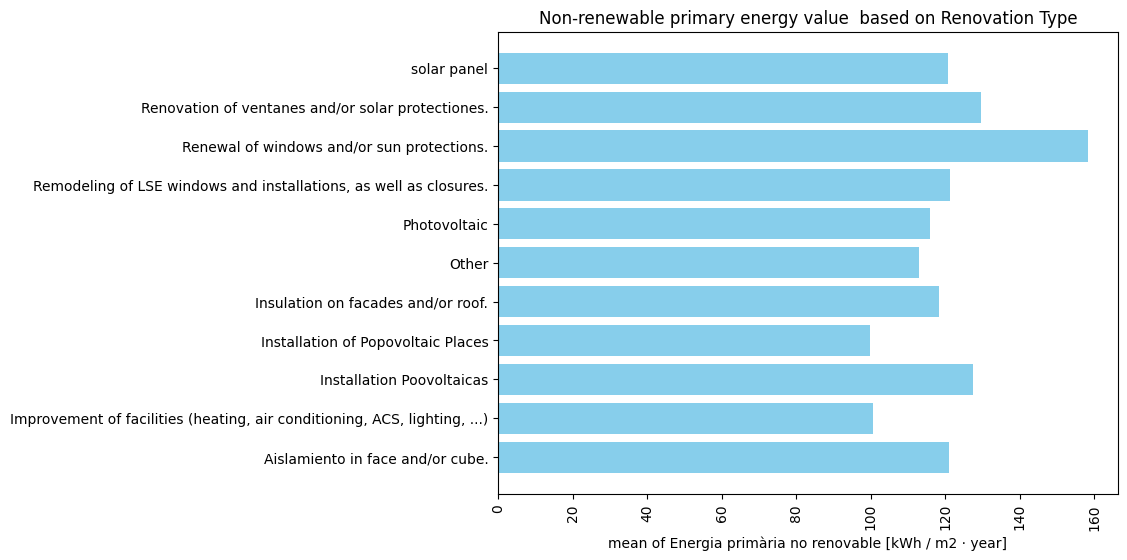

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Aggregate mean values for each renovation type
df_agg = merged_eda.groupby("grouped_translated").agg({
    "total_energy": "mean",
    "Energia primària no renovable": "mean",
    # "total_energy": "mean",
    # "preprocessed_Cost anual aproximat d'energia per habitatge": "mean"
}).reset_index()


fig, axs = plt.subplots( figsize=(8, 6))
# Plot first metric at the bottom
plt.barh(df_agg["grouped_translated"], df_agg["Energia primària no renovable"],
       label="Energia primària no renovable [kWh / m2 · year]", color="skyblue", )
plt.title("Non-renewable primary energy value  based on Renovation Type")
plt.xlabel("mean of Energia primària no renovable [kWh / m2 · year]")
plt.tick_params(axis='x', labelrotation=90)
plt.show()


cost and energy and co2 together

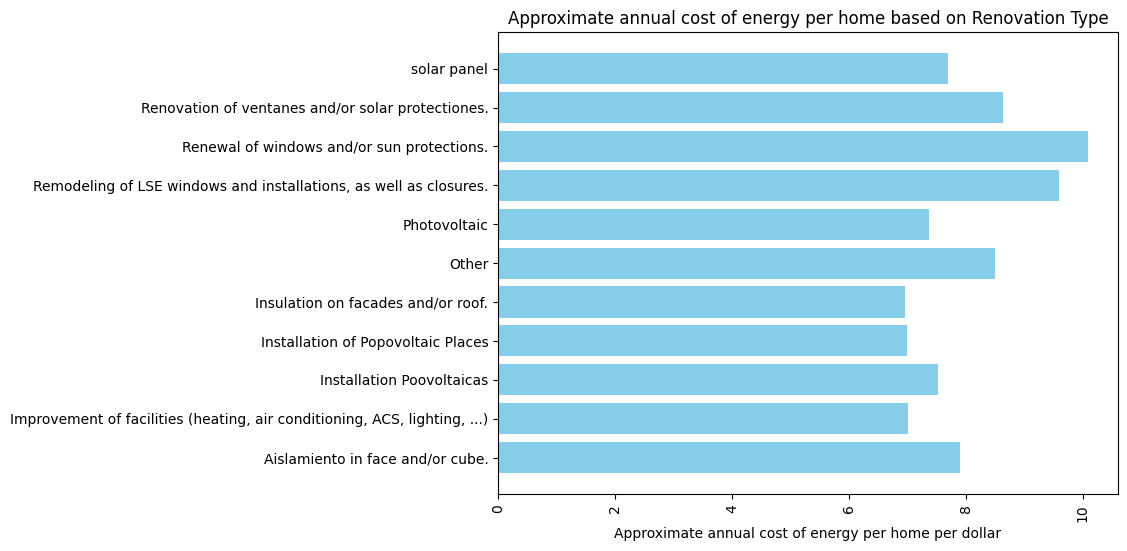

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Aggregate mean values for each renovation type
df_agg = merged_eda.groupby("grouped_translated").agg({
    "Cost anual aproximat d'energia per habitatge": "mean",

}).reset_index()


fig, axs = plt.subplots( figsize=(8, 6))
# Plot first metric at the bottom
plt.barh(df_agg["grouped_translated"], df_agg["Cost anual aproximat d'energia per habitatge"],
       label="Energia primària no renovable [kWh / m2 · year]", color="skyblue", )
plt.title("Approximate annual cost of energy per home based on Renovation Type")
plt.xlabel("Approximate annual cost of energy per home per dollar")
plt.tick_params(axis='x', labelrotation=90)
plt.show()


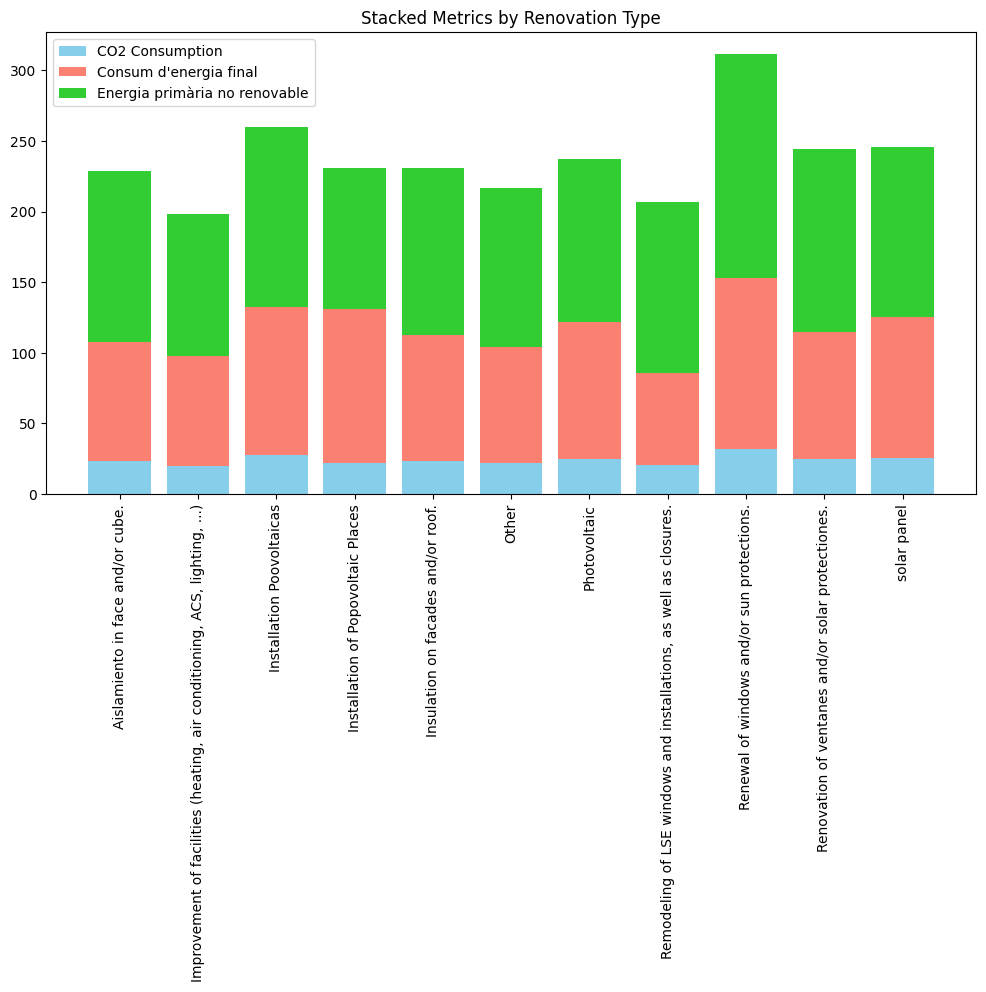

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Aggregate mean values for each renovation type
df_agg = merged_eda.groupby("grouped_translated").agg({
    "Emissions de CO2": "mean",
    "Consum d'energia final": "mean",
    "Energia primària no renovable": "mean"
}).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Plot first metric at the bottom
ax.bar(df_agg["grouped_translated"], df_agg["Emissions de CO2"],
       label="CO2 Consumption", color="skyblue")

# Plot second metric on top of the first using the bottom parameter
ax.bar(df_agg["grouped_translated"], df_agg["Consum d'energia final"],
       bottom=df_agg["Emissions de CO2"], label="Consum d'energia final", color="salmon")

# Calculate the cumulative bottom for the third metric and plot it
bottom_sum = df_agg["Emissions de CO2"] + df_agg["Consum d'energia final"]
ax.bar(df_agg["grouped_translated"], df_agg["Energia primària no renovable"],
       bottom=bottom_sum, label="Energia primària no renovable", color="limegreen")

ax.set_title("Stacked Metrics by Renovation Type")
# ax.set_xlabel("Renovation Type")
ax.legend()
plt.xticks(rotation=90)
plt.show()

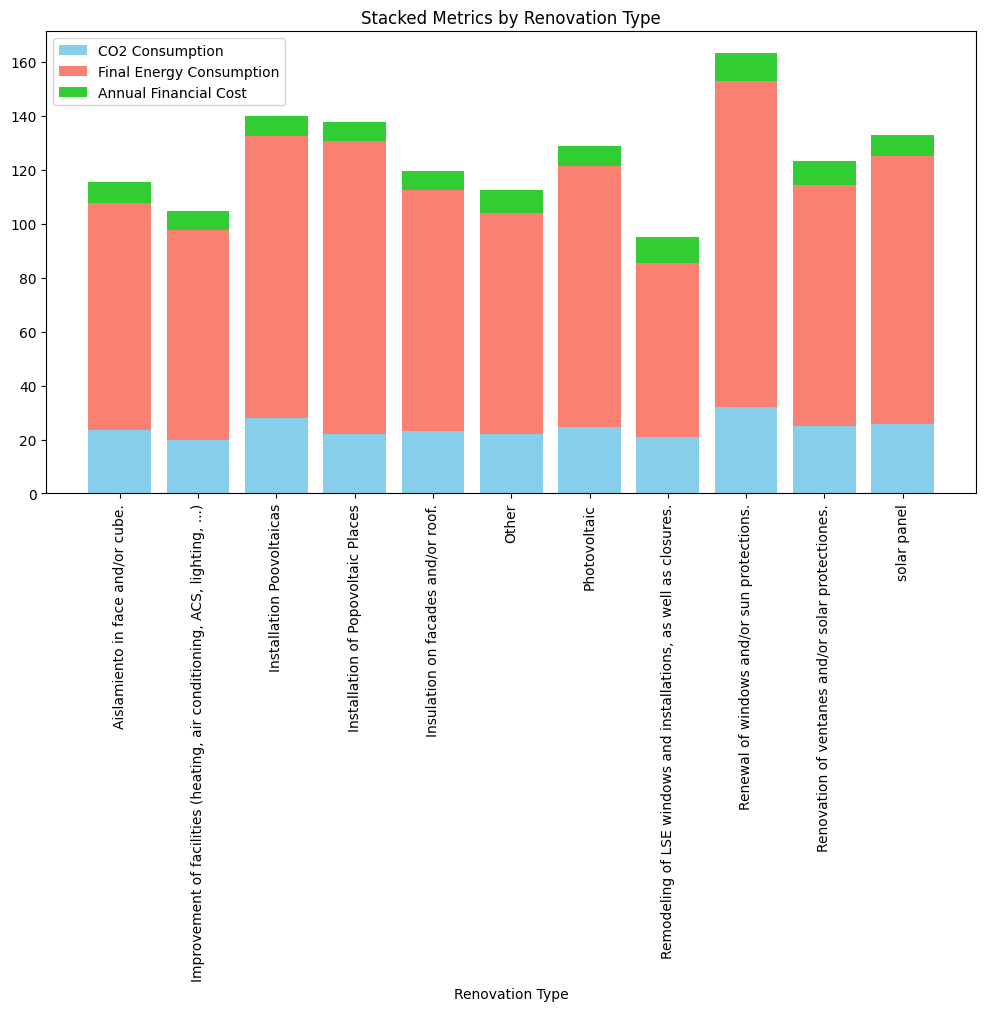

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Aggregate mean values for each renovation type
df_agg = merged_eda.groupby("grouped_translated").agg({
    "Emissions de CO2": "mean",
    "Consum d'energia final": "mean",
    "Cost anual aproximat d'energia per habitatge": "mean"
}).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Plot first metric at the bottom
ax.bar(df_agg["grouped_translated"], df_agg["Emissions de CO2"],
       label="CO2 Consumption", color="skyblue")

# Plot second metric on top of the first using the bottom parameter
ax.bar(df_agg["grouped_translated"], df_agg["Consum d'energia final"],
       bottom=df_agg["Emissions de CO2"], label="Final Energy Consumption", color="salmon")

# Calculate the cumulative bottom for the third metric and plot it
bottom_sum = df_agg["Emissions de CO2"] + df_agg["Consum d'energia final"]
ax.bar(df_agg["grouped_translated"], df_agg["Cost anual aproximat d'energia per habitatge"],
       bottom=bottom_sum, label="Annual Financial Cost", color="limegreen")

ax.set_title("Stacked Metrics by Renovation Type")
ax.set_xlabel("Renovation Type")
ax.legend()
plt.xticks(rotation=90)
plt.show()


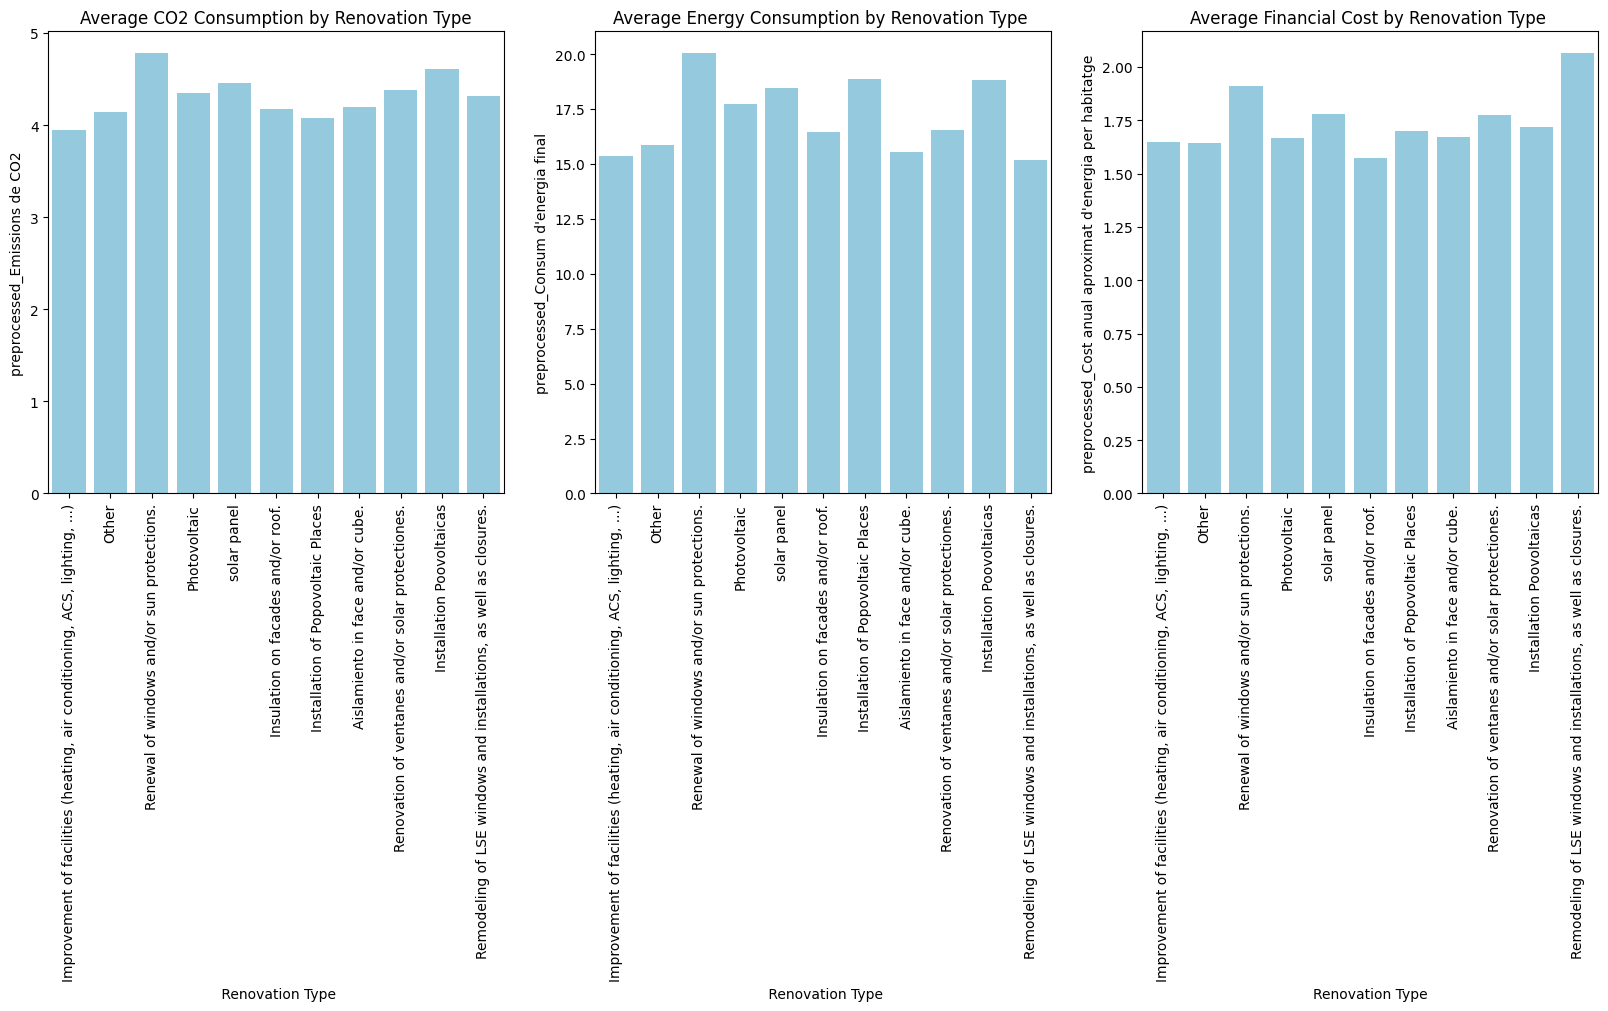

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
unique_categories = merged_eda['grouped_translated'].nunique()
colors = plt.cm.tab20(np.linspace(0, 1, unique_categories))
ax=axs[0]
sns.barplot(x='grouped_translated', y='preprocessed_Emissions de CO2', data=merged_eda, ci=None, ax=axs[0],color='skyblue')
ax.set_title(f'Average CO2 Consumption by Renovation Type', fontsize=12)
ax.set_xlabel(' Renovation Type', fontsize=10)
# ax.legend().set_title("renovation_type")
ax.tick_params(axis='x', labelrotation=90)
ax=axs[1]
sns.barplot(x='grouped_translated', y="preprocessed_Consum d'energia final", data=merged_eda, ci=None, ax=axs[1],color='skyblue')
ax.set_title(f'Average Energy Consumption by Renovation Type ', fontsize=12)
ax.set_xlabel(' Renovation Type', fontsize=10)
# ax.legend().set_title("renovation_type")
ax.tick_params(axis='x', labelrotation=90)
ax=axs[2]
sns.barplot(x='grouped_translated', y="preprocessed_Cost anual aproximat d'energia per habitatge", data=merged_eda, ci=None, ax=axs[2],color='skyblue')
ax.set_title(f'Average Financial Cost by Renovation Type ', fontsize=12)
ax.set_xlabel('Renovation Type', fontsize=10)
# ax.legend().set_title("renovation_type")
ax.tick_params(axis='x', labelrotation=90)
plt.show()


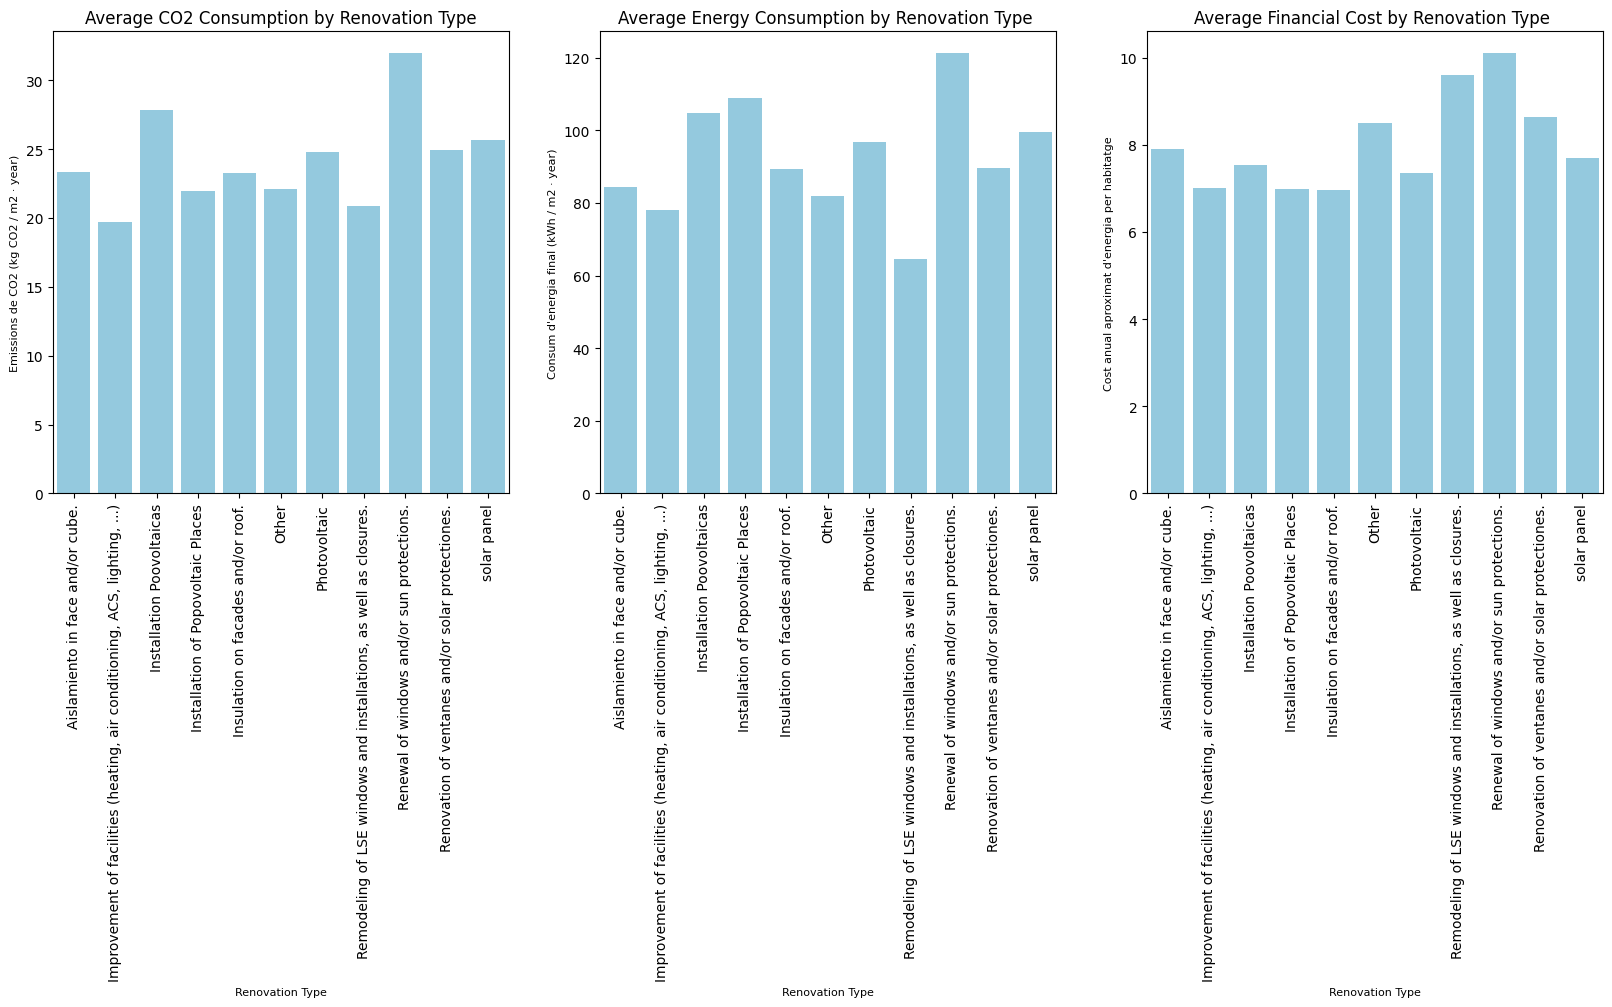

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by taking mean
aggregated_data = merged_eda.groupby('grouped_translated')[['Emissions de CO2', 'Consum d\'energia final', 'Cost anual aproximat d\'energia per habitatge']].mean().reset_index()

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

ax=axs[0]
sns.barplot(x='grouped_translated', y='Emissions de CO2', data=aggregated_data, ci=None, ax=axs[0], color='skyblue')
ax.set_title(f'Average CO2 Consumption by Renovation Type', fontsize=12)
ax.set_xlabel('Renovation Type', fontsize=8)
ax.set_ylabel('Emissions de CO2 (kg CO2 / m2 · year)', fontsize=8)
ax.tick_params(axis='x', labelrotation=90)

ax=axs[1]
sns.barplot(x='grouped_translated', y="Consum d'energia final", data=aggregated_data, ci=None, ax=axs[1], color='skyblue')
ax.set_title(f'Average Energy Consumption by Renovation Type ', fontsize=12)
ax.set_xlabel('Renovation Type', fontsize=8)
ax.set_ylabel("Consum d'energia final (kWh / m2 · year)", fontsize=8)
ax.tick_params(axis='x', labelrotation=90)

ax=axs[2]
sns.barplot(x='grouped_translated', y="Cost anual aproximat d'energia per habitatge", data=aggregated_data, ci=None, ax=axs[2], color='skyblue')
ax.set_title(f'Average Financial Cost by Renovation Type ', fontsize=12)
ax.set_xlabel('Renovation Type', fontsize=8)
ax.set_ylabel("Cost anual aproximat d'energia per habitatge", fontsize=8)
ax.tick_params(axis='x', labelrotation=90)

plt.show()


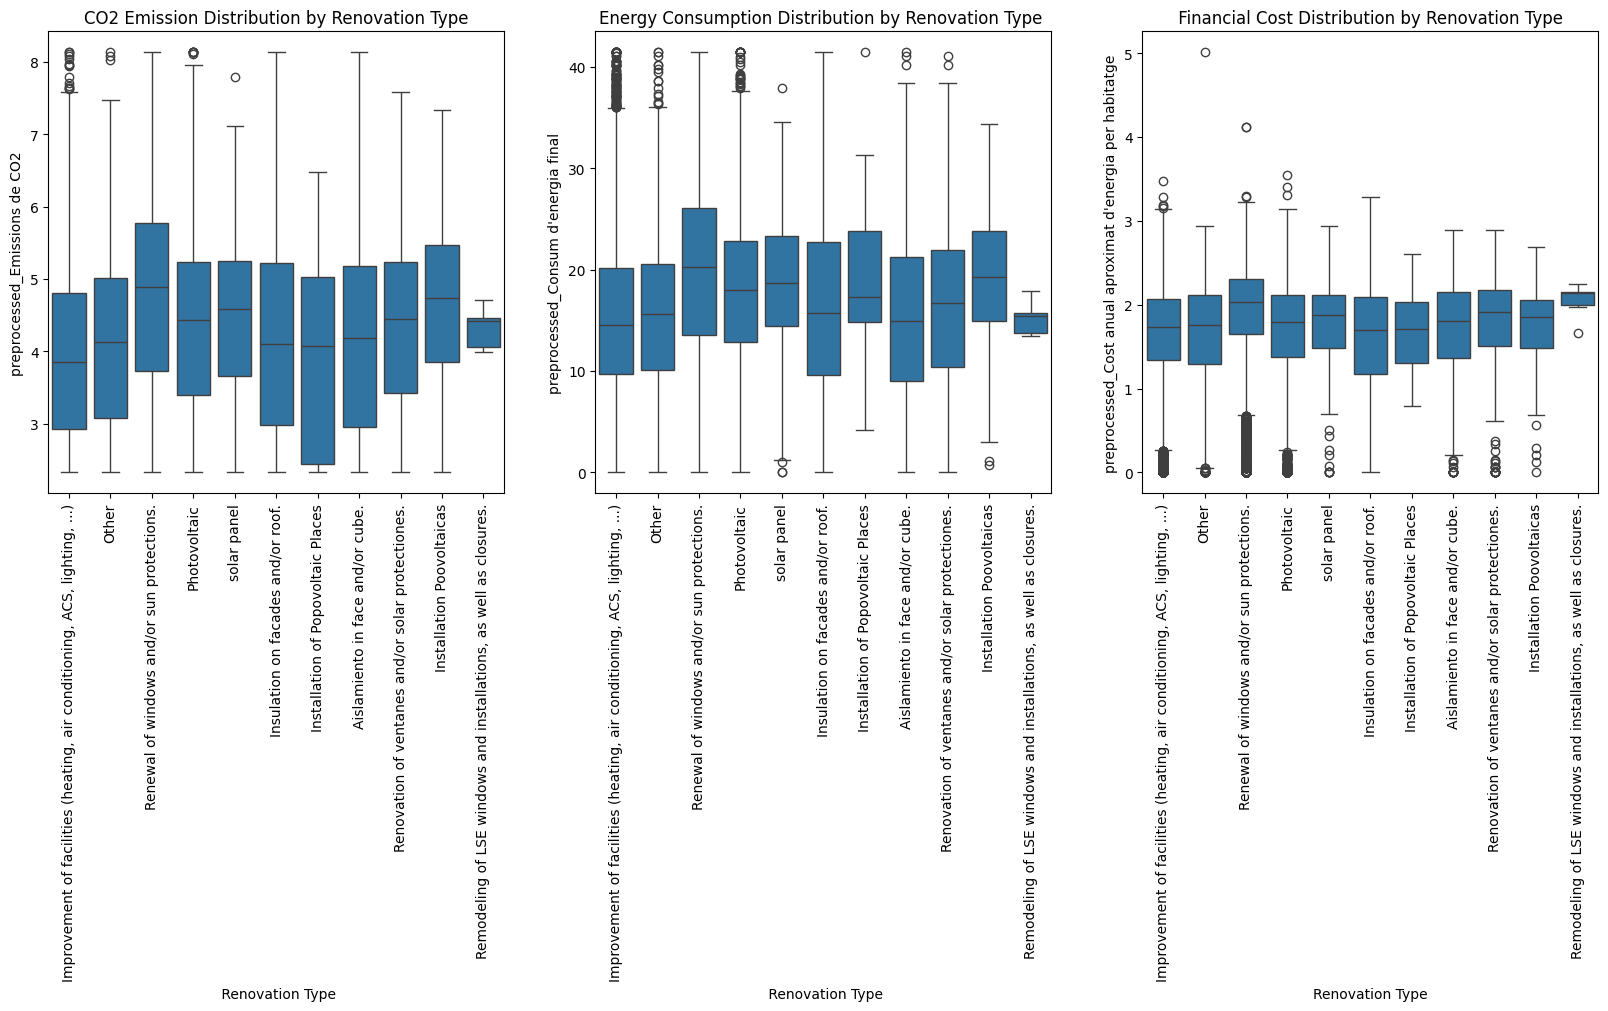

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
unique_categories = merged_eda['grouped_translated'].nunique()
colors = plt.cm.tab20(np.linspace(0, 1, unique_categories))

ax=axs[0]
sns.boxplot(x='grouped_translated', y='preprocessed_Emissions de CO2', data=merged_eda, ax=axs[0])
ax.set_title(f'CO2 Emission Distribution by Renovation Type', fontsize=12)
ax.set_xlabel(' Renovation Type', fontsize=10)
# ax.legend().set_title("renovation_type")
ax.tick_params(axis='x', labelrotation=90)
ax=axs[1]
sns.boxplot(x='grouped_translated', y="preprocessed_Consum d'energia final", data=merged_eda, ax=axs[1])
ax.set_title(f'Energy Consumption Distribution by Renovation Type ', fontsize=12)
ax.set_xlabel(' Renovation Type', fontsize=10)
# ax.legend().set_title("renovation_type")
ax.tick_params(axis='x', labelrotation=90)
ax=axs[2]
sns.boxplot(x='grouped_translated', y="preprocessed_Cost anual aproximat d'energia per habitatge", data=merged_eda, ax=axs[2])
ax.set_title(f' Financial Cost Distribution by Renovation Type ', fontsize=12)
ax.set_xlabel('Renovation Type', fontsize=10)
# ax.legend().set_title("renovation_type")
ax.tick_params(axis='x', labelrotation=90)
plt.show()



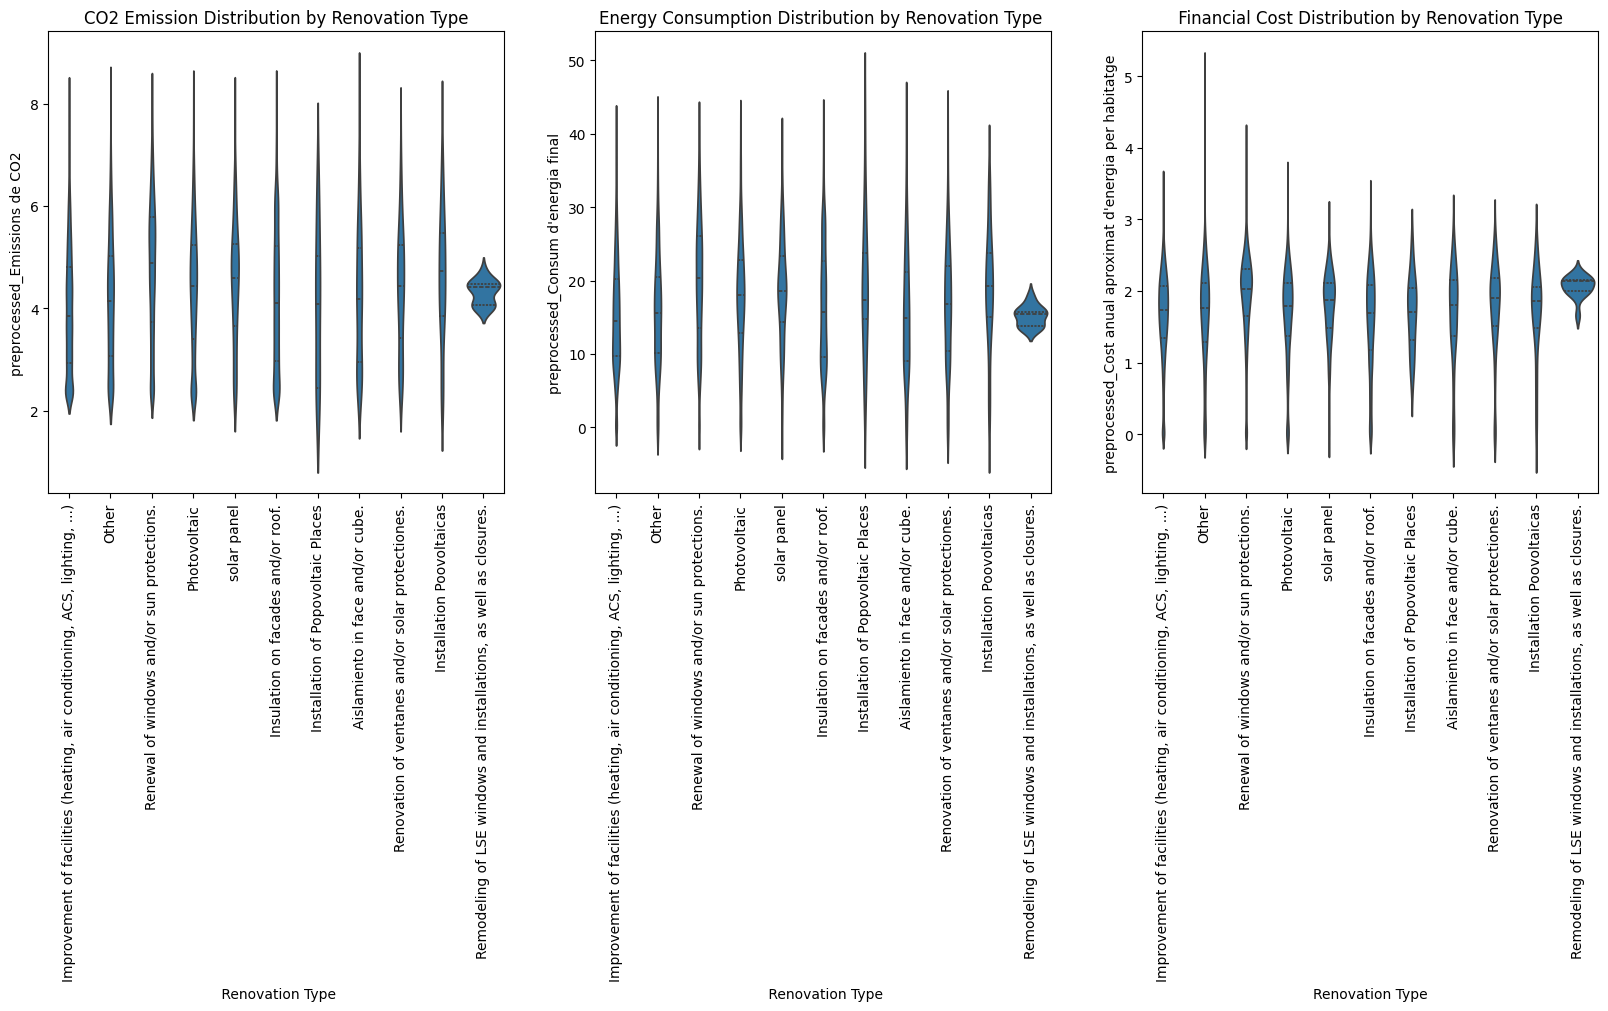

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
unique_categories = merged_eda['grouped_translated'].nunique()
colors = plt.cm.tab20(np.linspace(0, 1, unique_categories))
ax=axs[0]
sns.violinplot(x='grouped_translated', y='preprocessed_Emissions de CO2', data=merged_eda, ax=axs[0], inner='quartile')
ax.set_title(f'CO2 Emission Distribution by Renovation Type', fontsize=12)
ax.set_xlabel(' Renovation Type', fontsize=10)
# ax.legend().set_title("renovation_type")
ax.tick_params(axis='x', labelrotation=90)
ax=axs[1]
sns.violinplot(x='grouped_translated', y="preprocessed_Consum d'energia final", data=merged_eda, ax=axs[1], inner='quartile')
ax.set_title(f'Energy Consumption Distribution by Renovation Type ', fontsize=12)
ax.set_xlabel(' Renovation Type', fontsize=10)
# ax.legend().set_title("renovation_type")
ax.tick_params(axis='x', labelrotation=90)
ax=axs[2]
sns.violinplot(x='grouped_translated', y="preprocessed_Cost anual aproximat d'energia per habitatge", data=merged_eda, ax=axs[2], inner='quartile')
ax.set_title(f' Financial Cost Distribution by Renovation Type ', fontsize=12)
ax.set_xlabel('Renovation Type', fontsize=10)
# ax.legend().set_title("renovation_type")
ax.tick_params(axis='x', labelrotation=90)
plt.show()



#### Comparison between houses with and without renovation

In [ ]:
merged_eda.columns.tolist()

['NUM_CAS',
 'ADREÇA',
 'NUMERO',
 'ESCALA',
 'PIS',
 'PORTA',
 'CODI_POSTAL',
 'POBLACIO',
 'COMARCA',
 'NOM_PROVINCIA',
 'CODI_POBLACIO',
 'CODI_COMARCA',
 'CODI_PROVINCIA',
 'REFERENCIA CADASTRAL',
 'ZONA CLIMATICA',
 'METRES_CADASTRE',
 'ANY_CONSTRUCCIO',
 'US_EDIFICI',
 "Qualificació de consum d'energia primaria no renovable",
 'Energia primària no renovable',
 "Qualificacio d'emissions de CO2",
 'Emissions de CO2',
 "Consum d'energia final",
 "Cost anual aproximat d'energia per habitatge",
 'VEHICLE ELECTRIC',
 'SOLAR TERMICA',
 'SOLAR FOTOVOLTAICA',
 'SISTEMA BIOMASSA',
 'XARXA DISTRICTE',
 'ENERGIA GEOTERMICA',
 'INFORME_INS_TECNICA_EDIFICI',
 'Eina de certificacio',
 'VALOR AILLAMENTS',
 'VALOR FINESTRES',
 'Motiu de la certificacio',
 'VALOR AILLAMENTS CTE',
 'VALOR FINESTRES CTE',
 'UTM_X',
 'UTM_Y',
 'Normativa construcció',
 'Tipus Tramit',
 'TIPUS_TERCIARI',
 'Qualificació emissions calefacció',
 'Emissions calefacció',
 'Qualificació emissions refrigeració',
 'Emissions 

In [ ]:
merged_eda['binary_ACTUACIONS_REHABILITACIO'] = merged_eda['ACTUACIONS_REHABILITACIO'].apply(lambda x : 'NO' if  pd.isna(x) else 'YES')
merged_eda['binary_ACTUACIONS_REHABILITACIO'].value_counts()

,count
binary_ACTUACIONS_REHABILITACIO,
NO,1319813
YES,25912


In [ ]:

merged_eda.groupby( 'binary_ACTUACIONS_REHABILITACIO')['Emissions de CO2'].agg(['mean', 'median', 'std', 'count']).reset_index()

,binary_ACTUACIONS_REHABILITACIO,mean,median,std,count
0,NO,43.829510,39.69,147.586694,1319688
1,YES,24.708247,20.58,19.329571,25912


In [ ]:
merged_eda.groupby( 'binary_ACTUACIONS_REHABILITACIO')['Emissions de CO2 per m2'].agg(['mean', 'median', 'std', 'count']).reset_index()


,binary_ACTUACIONS_REHABILITACIO,mean,median,std,count
0,NO,0.636326,0.522679,2.193109,1319688
1,YES,0.235372,0.156167,0.279795,25912


In [ ]:
merged_eda.groupby( 'binary_ACTUACIONS_REHABILITACIO')['Energia primària no renovable'].agg(['mean', 'median', 'std', 'count']).reset_index()


,binary_ACTUACIONS_REHABILITACIO,mean,median,std,count
0,NO,210.863774,195.100,250.595773,1319683
1,YES,123.423621,105.615,91.209357,25912


In [ ]:
merged_eda.groupby( 'binary_ACTUACIONS_REHABILITACIO')["Consum d'energia final"].agg(['mean', 'median', 'std', 'count']).reset_index()


,binary_ACTUACIONS_REHABILITACIO,mean,median,std,count
0,NO,133.128074,129.90,138.922609,1291422
1,YES,95.156416,78.13,77.512022,25683


In [ ]:
merged_eda.groupby( 'binary_ACTUACIONS_REHABILITACIO')["Consum d'energia final_per_m2"].agg(['mean', 'median', 'std', 'count']).reset_index()


,binary_ACTUACIONS_REHABILITACIO,mean,median,std,count
0,NO,1.895059,1.596000,3.110863,1291422
1,YES,0.896333,0.589518,1.170522,25683


In [ ]:
merged_eda.groupby( 'binary_ACTUACIONS_REHABILITACIO')['Cost per kWh'].agg(['mean', 'median', 'std', 'count']).reset_index()


,binary_ACTUACIONS_REHABILITACIO,mean,median,std,count
0,NO,6.491871,0.128952,68.467006,1182979
1,YES,0.099959,0.087365,0.073170,25384


In [ ]:

merged_eda.groupby( 'binary_ACTUACIONS_REHABILITACIO')["Cost anual aproximat d'energia per habitatge"].agg(['mean', 'median', 'std', 'count']).reset_index()


,binary_ACTUACIONS_REHABILITACIO,mean,median,std,count
0,NO,860.661559,15.19,9552.555394,1291422
1,YES,8.063728,6.82,11.342084,25683


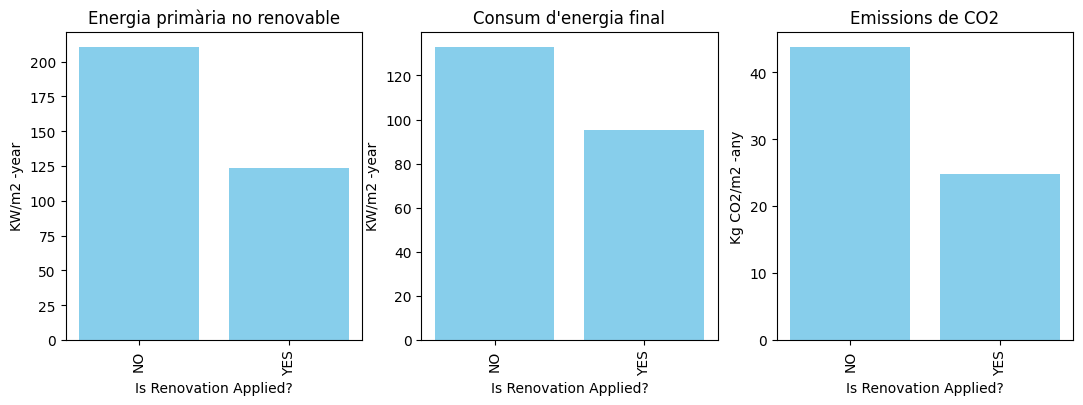

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_agg = merged_eda.groupby("binary_ACTUACIONS_REHABILITACIO").agg({
    "Energia primària no renovable": "mean",
    "Consum d'energia final": "mean",
    'Emissions de CO2': "mean",
}).reset_index()

fig, axs = plt.subplots(1,3, figsize=(13, 4))
ax = axs[0]
ax.bar(df_agg["binary_ACTUACIONS_REHABILITACIO"], df_agg["Energia primària no renovable"], color="skyblue" )
ax.set_title("Energia primària no renovable")
ax.set_ylabel('KW/m2 -year')
ax.set_xlabel('Is Renovation Applied?')
ax.tick_params(axis='x', labelrotation=90)

ax = axs[1]
ax.bar(df_agg["binary_ACTUACIONS_REHABILITACIO"], df_agg["Consum d'energia final"],color="skyblue", )
ax.set_title("Consum d'energia final")
ax.set_ylabel('KW/m2 -year')
ax.set_xlabel('Is Renovation Applied?')
ax.tick_params(axis='x', labelrotation=90)

ax = axs[2]
ax.bar(df_agg["binary_ACTUACIONS_REHABILITACIO"], df_agg['Emissions de CO2'],color="skyblue", )
ax.set_title("Emissions de CO2")
ax.set_xlabel('Is Renovation Applied?')
ax.set_ylabel('Kg CO2/m2 -any')
ax.tick_params(axis='x', labelrotation=90)
plt.show()


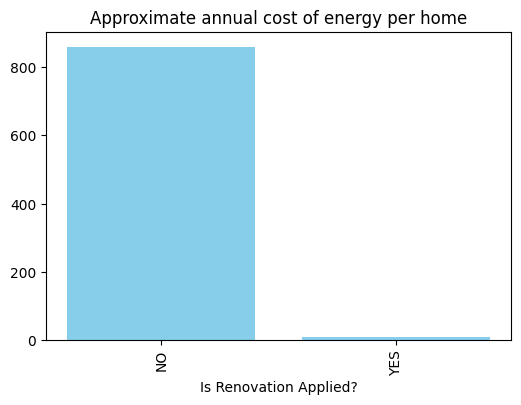

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_agg = merged_eda.groupby("binary_ACTUACIONS_REHABILITACIO").agg({
    "Cost anual aproximat d'energia per habitatge": "mean",

}).reset_index()

fig, axs = plt.subplots( figsize=(6, 4))
plt.bar(df_agg["binary_ACTUACIONS_REHABILITACIO"], df_agg["Cost anual aproximat d'energia per habitatge"], color="skyblue" )
plt.title("Approximate annual cost of energy per home")
plt.xlabel('Is Renovation Applied?')
plt.tick_params(axis='x', labelrotation=90)
plt.show()
